## Ohad Lavie 209805787
## Ronen Hristoforov 318639028

## About the Dataset

Source: https://archive.ics.uci.edu/dataset/2/adult
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. The original dataset contains around 48,000 rows but for faster computation we will be using only 2000 rows in this section.

  <u>Content</u>

- **age**: Age of the person  
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked  
- **fnlwgt**: continuous  
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool  
- **education-num**: continuous  
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse  
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces  
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried  
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black  
- **sex**: Female, Male  
- **capital-gain**: continuous  
- **capital-loss**: continuous  
- **hours-per-week**: continuous  
- **native-country**: Country of origin for the person  

### Imports

In [152]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings(
    "ignore",
    message="No artists with labels found to put in legend"
)
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler


### Importing the Data from the source


In [153]:
'''
Adult Income Dataset Fetcher
This script fetches the Adult Income dataset from the UCI Machine Learning Repository.
It reads the training and test portions, applies necessary preprocessing,
and combines them into a single DataFrame.


# Column names from the UCI page
cols = [
    'age','workclass','fnlwgt','education','education-num',
    'marital-status','occupation','relationship','race','sex',
    'capital-gain','capital-loss','hours-per-week','native-country','income'
]

# URLs for the data files
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# 1) Training portion
df_train = pd.read_csv(
    data_url,
    names=cols,
    sep=r',\s*',
    engine='python',
    na_values='?'
)

# 2) Test portion (the first row is a header line we skip)
df_test = pd.read_csv(
    test_url,
    names=cols,
    sep=r',\s*',
    engine='python',
    skiprows=1,
    na_values='?'
)

# 3) Concatenate if you want a single DataFrame
df = pd.concat([df_train, df_test], ignore_index=True)

'''

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_80919/3958631283.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''


"\nAdult Income Dataset Fetcher\nThis script fetches the Adult Income dataset from the UCI Machine Learning Repository.\nIt reads the training and test portions, applies necessary preprocessing,\nand combines them into a single DataFrame.\n\n\n# Column names from the UCI page\ncols = [\n    'age','workclass','fnlwgt','education','education-num',\n    'marital-status','occupation','relationship','race','sex',\n    'capital-gain','capital-loss','hours-per-week','native-country','income'\n]\n\n# URLs for the data files\ndata_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'\ntest_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'\n\n# 1) Training portion\ndf_train = pd.read_csv(\n    data_url,\n    names=cols,\n    sep=r',\\s*',\n    engine='python',\n    na_values='?'\n)\n\n# 2) Test portion (the first row is a header line we skip)\ndf_test = pd.read_csv(\n    test_url,\n    names=cols,\n    sep=r',\\s*',\n    engine='pytho

In [154]:

# 1. Fetch the Adult dataset (ID=2)
adult = fetch_ucirepo(id=2)

# 2. Extract features and target
X = adult.data.features        # pandas DataFrame
y_raw = adult.data.targets         # could be a Series or 1-col DataFrame

# 3. Turn y_raw into a flat Series named “income”


if isinstance(y_raw, pd.DataFrame):
    y = y_raw.iloc[:, 0]           # grab the single column
else:
    y = pd.Series(y_raw)

y.name = 'income'

#concatenate X and y into a single DataFrame
df = pd.concat([X, y], axis=1)



<h1 style="text-align: center;">EDA</h1>

## First look at the Data

In [155]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
df.head(10)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K  
5             0             0              40  United-States  <=50K  
6             0             0              16        Jamaica  <=50K  
7             0             0              45  United-States   >50K  
8         14084             0              50  United-States   >50K  
9          5178             0              40  United-States   >50K

In [156]:
df.shape

(48842, 15)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Data cleaning

### Checking for misssing values

Columns with missing values:
workclass         963
occupation        966
native-country    274
dtype: int64
----------------------
Percentage of missing values per column :
workclass         1.971664
occupation        1.977806
native-country    0.560993
dtype: float64


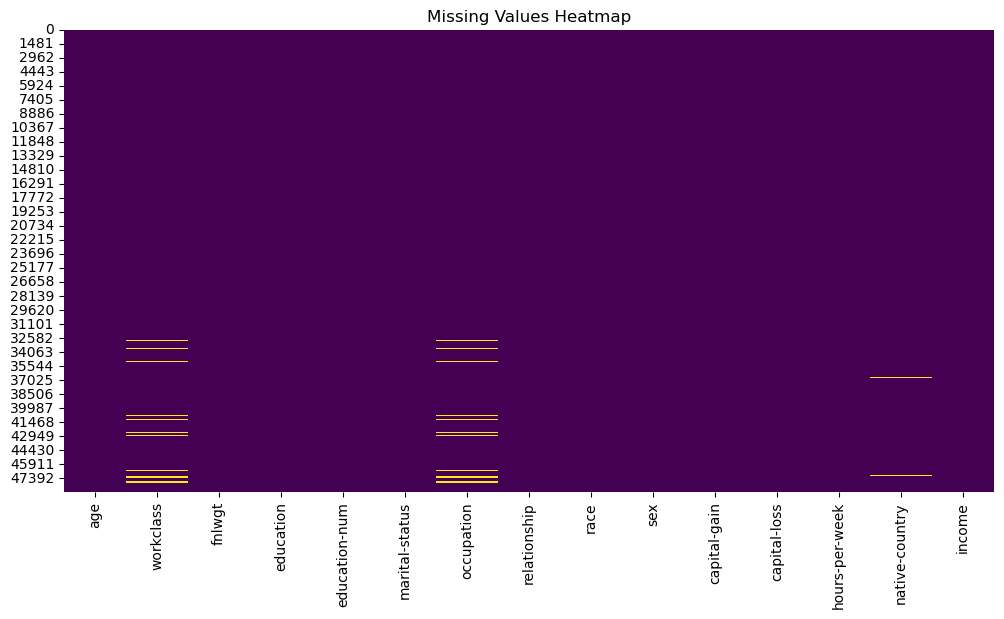

In [158]:
#print only columns with missing values
print("Columns with missing values:")
missing_columns = df.columns[df.isnull().any()]
num_missing_values = df[missing_columns].isnull().sum()
print(num_missing_values)
print("----------------------")
# to get a better understanding of what percentage of the columns are missing
missing_percentage = df[missing_columns].isnull().sum() / len(df) * 100
print(f"Percentage of missing values per column :\n{missing_percentage}")
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Based on missing values percentiles, we think that we can infer meaningful data from the missing values.
- By replacing the "null" values with the string "missing" we can hopefully learn from the dataset.
- We think that the missing data is refering to unoccupied people, however we're not certain, as it was not mentioned on the dataset documentation.

- The missing values in the 'native country' column will be dropped as they are very scarce and we believe they dont contribute to any relevant question.

In [159]:
df['workclass'] = df['workclass'].fillna('missing')
df['occupation'] = df['occupation'].fillna('missing')
#drop the rows with missing values in the 'native-country' column
df = df.dropna(subset=['native-country'])

### Verifying that the Data cleaning worked

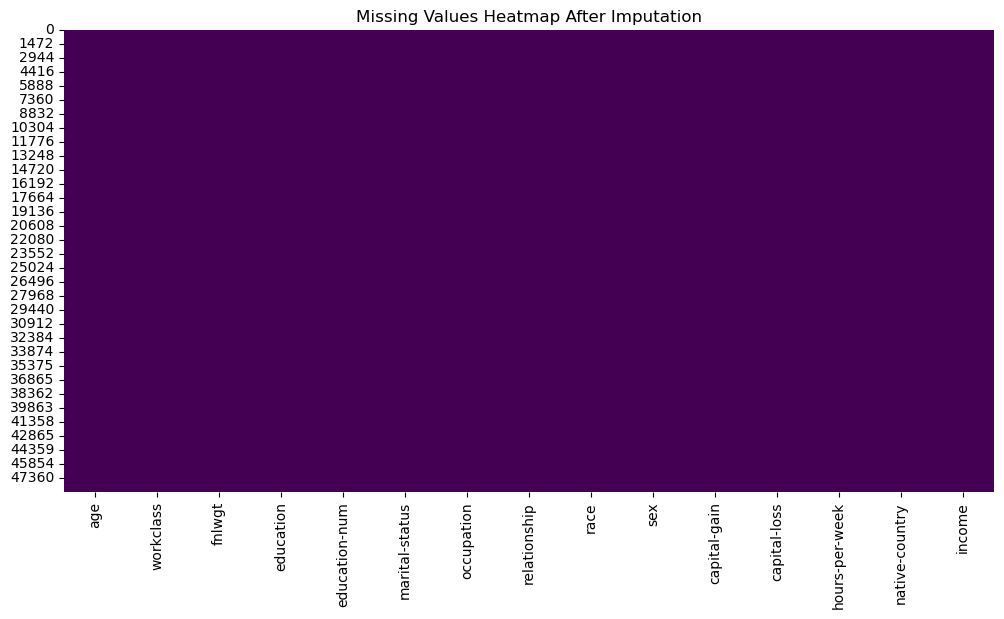

In [160]:
# checking for missing values and plotting the heatmap again
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Imputation')    
plt.show()

Unique values per column :
age                  74
workclass            10
fnlwgt            28424
education            16
education-num        16
marital-status        7
occupation           16
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64


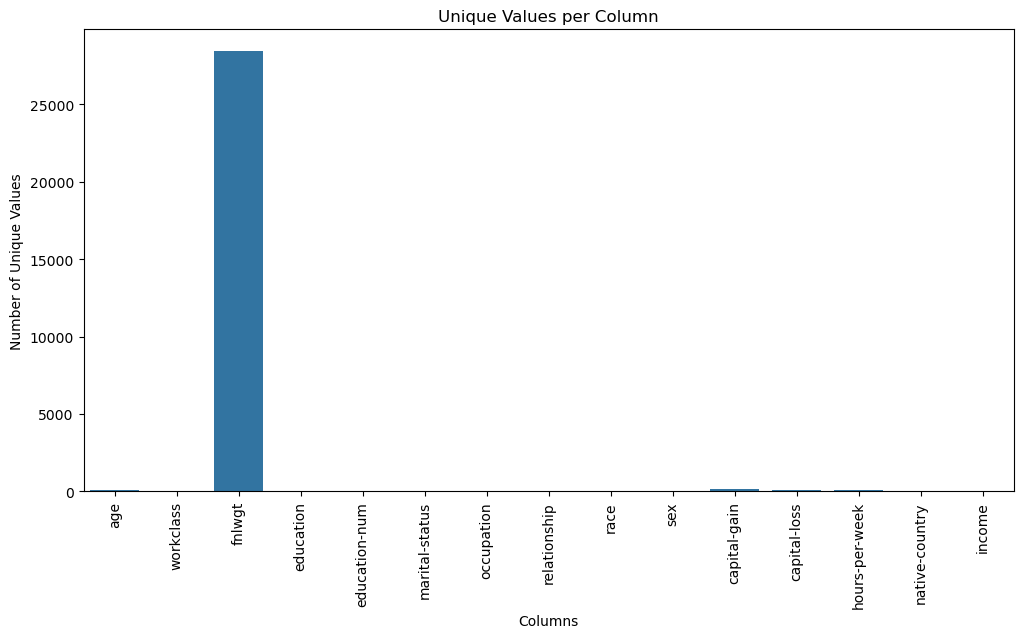

In [161]:
#we want to see how many unique values are in each column and plot them using countplot
unique_values = df.nunique()
print(f"Unique values per column :\n{unique_values}")
# Plotting the unique values
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.xticks(rotation=90)
plt.title('Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.show()



#### The column "fnlwgt" looks odd - it has 28k unique value, we assume that it can be something like  the id of each person, but then it means that there are duplicated rows

In [162]:
#lets check the odd values in fnlwgt
df['fnlwgt'].describe()


count    4.856800e+04
mean     1.896385e+05
std      1.056425e+05
min      1.228500e+04
25%      1.175085e+05
50%      1.781570e+05
75%      2.375868e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

<u> Observation :</u>
- didnt get anything intresting.

 <u>Conclusion :</u>
- we will drop this column as we cannot attain meaningful insights from it.


In [163]:
 # dropping the fnlwgt column
df.drop(columns=['fnlwgt'], inplace=True) 
df.head()

age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

### we want to inspect the columns where we found missing values : 
- 'workclass' 
- 'occupation'

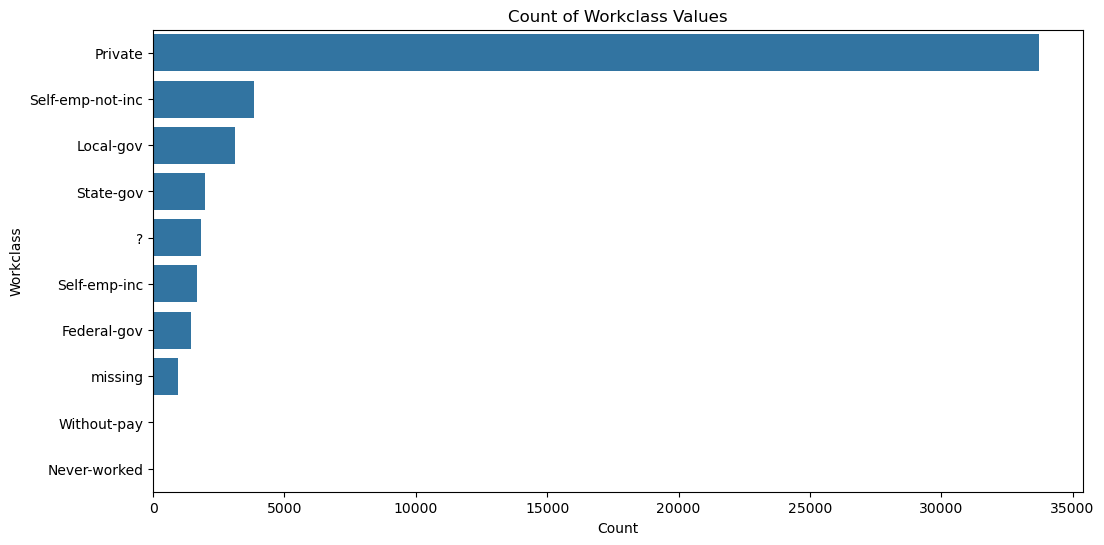

In [164]:
#lets see the values  in the 'workclass' column
df['workclass'].value_counts()
#plot the values in the 'workclass' column
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Count of Workclass Values')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()





<u>Observation:</u>

 we can see that theres a unknown value '?' 

<u>Conclusion :</u>

 we will add this value to 'missing' value.



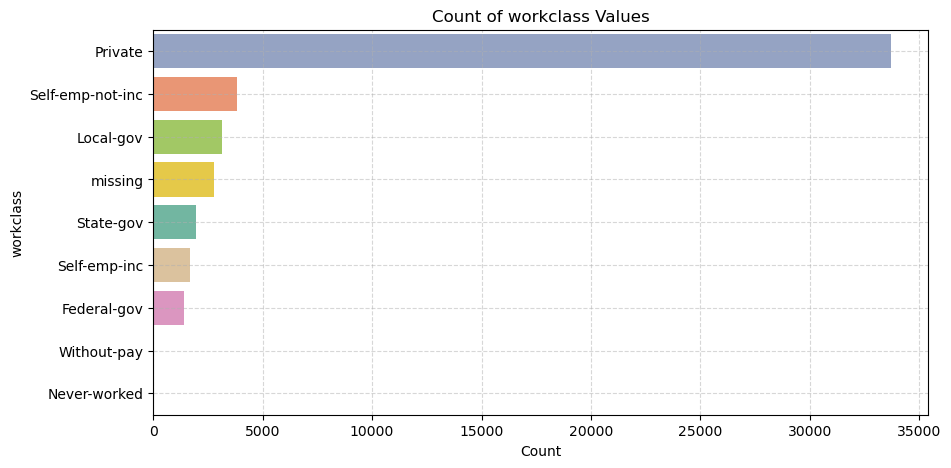

In [165]:
#adding the '?' values to the missing values
df['workclass'] = df['workclass'].replace('?', 'missing')
# creating a function to plott the values in the  column again
def plot_column_values(column_name):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column_name, data=df, order=df[column_name].value_counts().index, hue= column_name, palette='Set2')
    plt.title(f'Count of {column_name} Values')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
# plotting the values in the 'workclass' column again
plot_column_values('workclass')


<h3><u> Observation :</h3></u>

- ~70% of the Data consists of people working in the Private sector.

- There are 3 goverment workclasses : Federal-gov, State-gov, Local-gov

<h3><u> Conclusion :</h3></u>

- We can create one category called Goverment and unite all 3 workclasses as one.

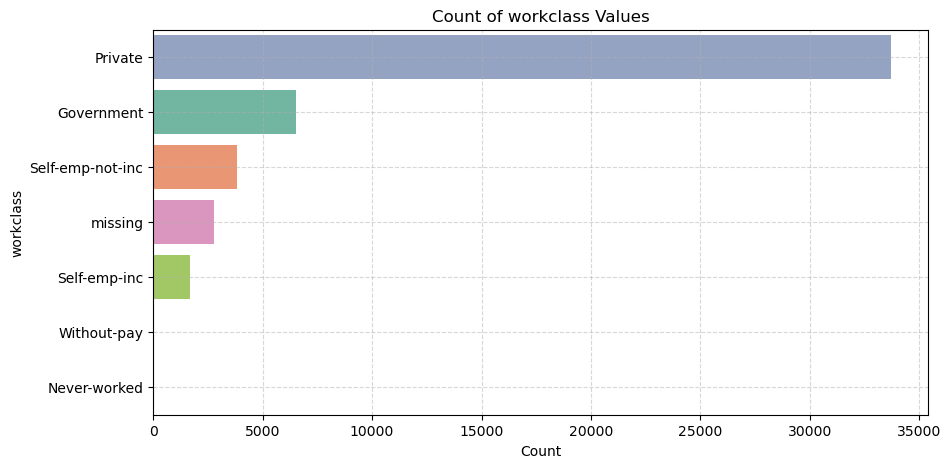

In [166]:
# creating a new value called 'Goverment' for the 'workclass' column
df['workclass'] = df['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Government')
# plotting the values in the 'workclass' column again
plot_column_values('workclass')

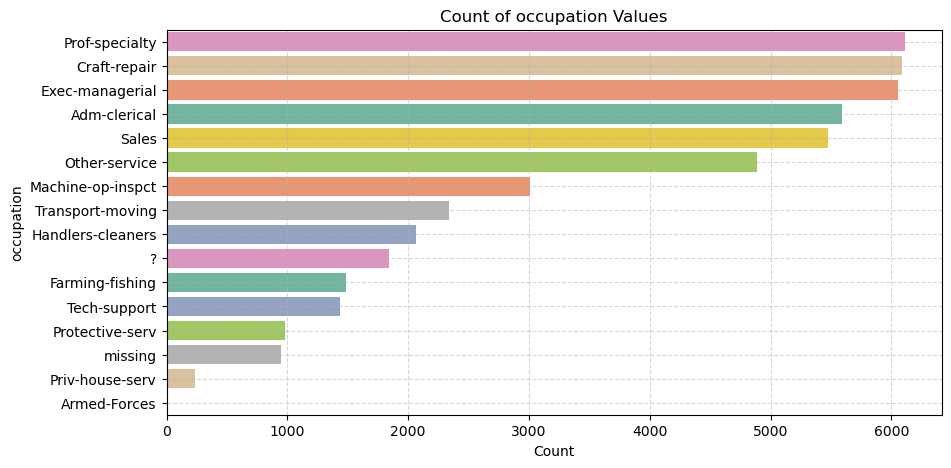

In [167]:
#chcecking if the '?' phenomenon is present in the 'occupation' column and plotting the values in the 'occupation' column
plot_column_values('occupation')


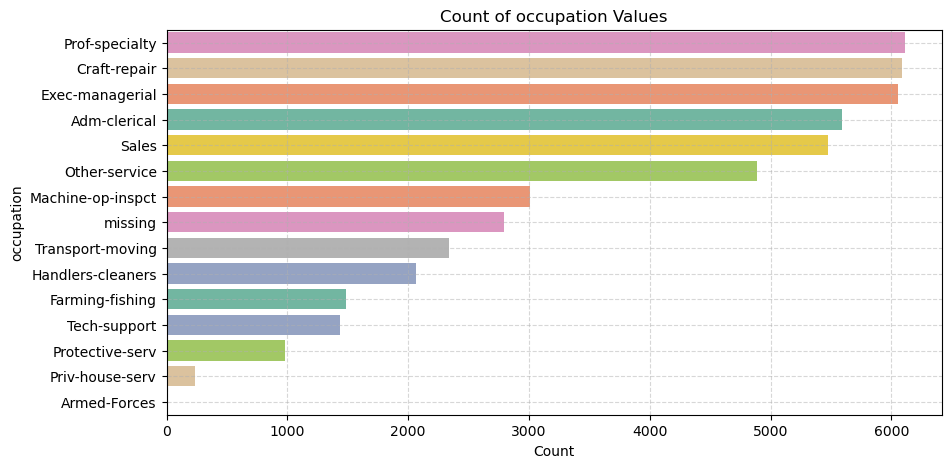

In [168]:
#adding the '?' values to the missing values
df['occupation'] = df['occupation'].replace('?', 'missing')
#plotting the values in the 'occupation' column after replacing '?' with 'missing'
plot_column_values('occupation')

<h3><u> Observation :</h3></u>

- Top Three Occupations Are Almost Tied :
	
	Prof-specialty (~6,200), Craft-repair (~6,100), and Exec-managerial (~6,000) are the most frequent categories, each appearing in roughly 6 K of the ~48 K rows.

	Together, those three alone make up about 37 % of all records. In other words, more than third of the dataset works in professional specialties, crafts/repairs, or executive/managerial roles.
- Mid‐Tier Occupations:
	•	Adm-clerical (~5,500) and Sales (~5,300) also appear very often (each roughly 5.5–5.3 K).
	•	Other-service (~4,800) rounds out the “top six” occupations, meaning nearly half of everyone falls into these six job categories.
- Long Tail of Less Common Jobs
	•	After “Other-service,” counts drop sharply



<h3><u> Implications :</h3></u>

- High‐frequency categories (Prof-specialty, Craft-repair, Exec-managerial, Adm-clerical, Sales, Other-service) together account for ~60 % of the data. It might make sense to leave those as distinct dummy variables.

- Rare occupations ( Priv-house-serv, Armed-Forces, and perhaps anything under ~1 % frequency) could be grouped into an “Other” or “Rare” bucket, or we can drop them if they add noise.

In [169]:
#checking if there are any '?' values in our dataframe
df[df.isin(['?']).any(axis=1)].head()



age workclass     education  education-num         marital-status  \
14   40   Private     Assoc-voc             11     Married-civ-spouse   
38   31   Private  Some-college             10     Married-civ-spouse   
51   18   Private       HS-grad              9          Never-married   
61   32   missing       7th-8th              4  Married-spouse-absent   
93   30   Private       HS-grad              9     Married-civ-spouse   

       occupation   relationship                race     sex  capital-gain  \
14   Craft-repair        Husband  Asian-Pac-Islander    Male             0   
38          Sales        Husband               White    Male             0   
51  Other-service      Own-child               White  Female             0   
61        missing  Not-in-family               White    Male             0   
93          Sales           Wife  Asian-Pac-Islander  Female             0   

    capital-loss  hours-per-week native-country income  
14             0              40              ?   >50K  
38             0              38              ?   >50K  
51             0              30              ?  <=50K  
61             0              40              ?  <=50K  
93          1573              35              ?  <=50K

We can see that the '?' values are shown in the 'native-country' column, which makes sense. we will replace it with 'missing' as in the last columns we have checked, and continue to search for more '?' values in other columns

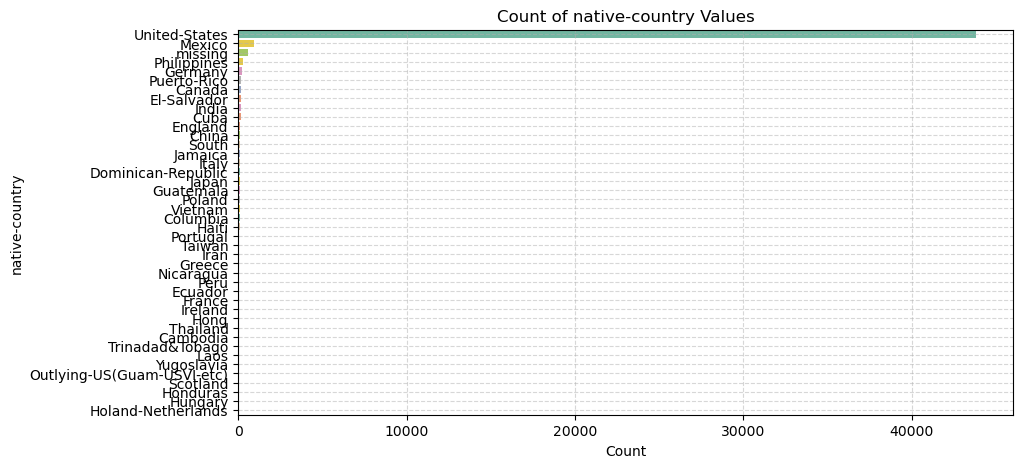

In [170]:

df.replace({'native-country': {'?': 'missing'}}, inplace=True)
#plotting the values in the 'native-country' column
plot_column_values('native-country')


<h3><u> Observation :</h3></u>

- ~91% of the data consists of people from the US

- ~2% of the data consists of people from Mexico

- The rest of the countries have less than 0.6% each of the data.

In [171]:
#chekcing if there are any '?' values in a non 'native country' column, if so we will replace them with 'missing'

# Check for '?' values in the entire DataFrame
mask = df.isin(['?'])

# Drop the 'native_country' column from the mask
mask_excl_country = mask.drop(columns=['native-country'])

# Check if any '?' values exist outside 'native_country'
has_question_marks_elsewhere = mask_excl_country.any().any()

print("Are there any '?' outside 'native-country'?", has_question_marks_elsewhere)

Are there any '?' outside 'native-country'? False


In [172]:
df.describe()

age  education-num  capital-gain  capital-loss  hours-per-week
count  48568.000000   48568.000000  48568.000000  48568.000000    48568.000000
mean      38.642295      10.073608   1075.908726     87.741414       40.424704
std       13.714365       2.568636   7430.021192    403.581741       12.391966
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

<u><h2>Observation:</u></h2>

- The mean age is around 38.
- Median of education num is 10 --> 50% of the Dataset have education lower than 10th grade, and 50% have education level greater than 10th grade
- After checking the overall USA statistics, we have found that the median for people over 25 in the USA, according to  "2022 American Community Survey" is "some college, no degree", so the dataset doesnt fit the overall population.

    source : https://data.census.gov/table/ACSST1Y2022.S1501?utm_

- we can see the there are no 'anomalie' values like age > 120 or a negative capital-gain ... its a good sign that our data is clean

### Now we know that our data is clean of missing or unidentified Data.

### There are 2 columns with education, maybe 'education-num' is the numerical column of education ?

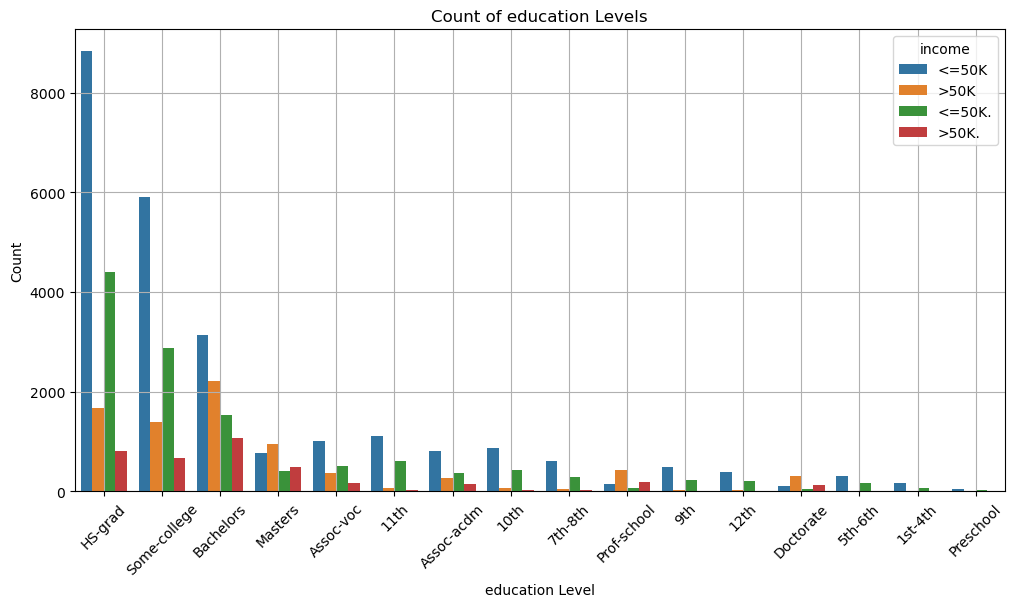

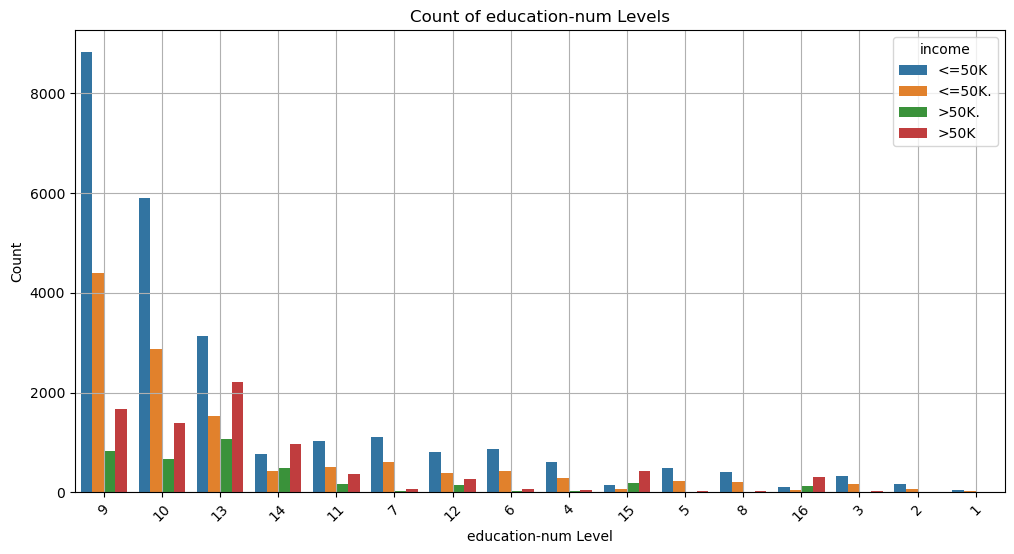

In [173]:
# we want to see if there are any correllations bwtween 'education-num' and 'education'
#lets make a function to plot the 'education' column
def plot_column_distribution(column_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column_name, data=df, order=df[column_name].value_counts().index,hue='income')
    plt.title(f'Count of {column_name} Levels')
    plt.ylabel('Count')
    plt.xlabel(f'{column_name} Level')
    plt.xticks(rotation=45)
    plt.legend(title='income', loc='upper right')
    plt.grid(True)
    plt.show()
# Plotting the 'education' column
plot_column_distribution('education')
#lets plot the 'education-num' column
plot_column_distribution('education-num')


<u><h2>Observation:</u></h2>

There are 4 values to 'income', 2 of which are redundant 

<u><h2>Conclusion:</u></h2>

we will unite them.

In [174]:
#lets union the '<=50k' and '<=50k.' to a one value
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df['income'].value_counts()

income
<=50K    36955
>50K     11613
Name: count, dtype: int64

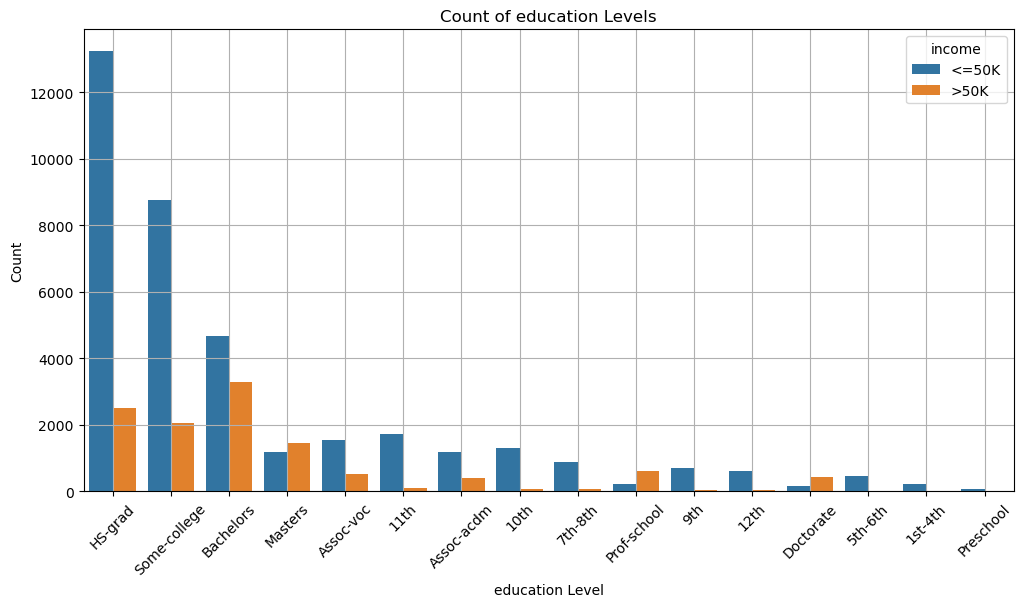

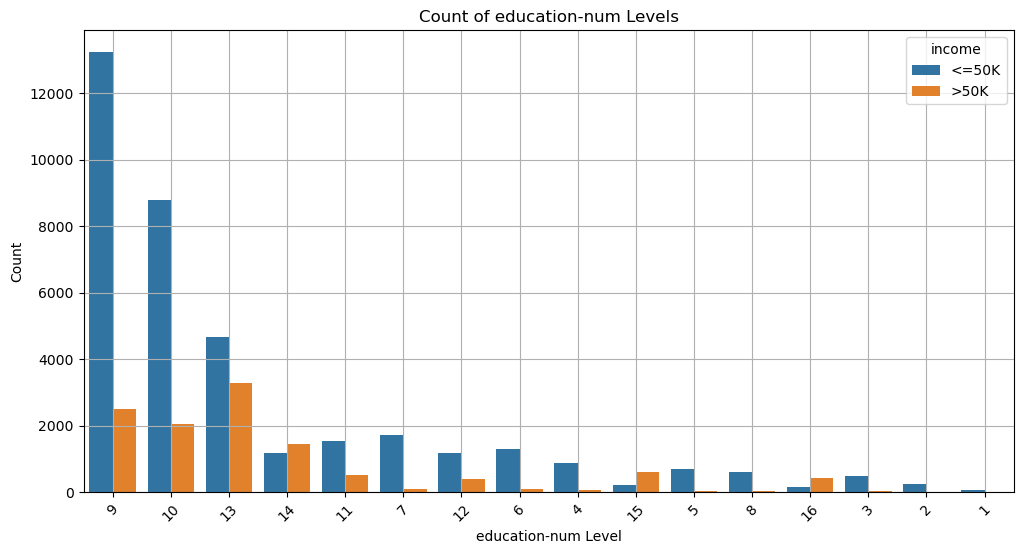

In [175]:
#lets plot the 'education' column
plot_column_distribution('education')
#lets plot the 'education-num' column
plot_column_distribution('education-num')

 it seems as though the 2 plots are identical, however the values are placed differently. 
 
 we need to figure out what values align between the 2 plots.

In [176]:

print(df['education'].value_counts())
print("-------------------------------------------------")
print(df['education-num'].value_counts())

education
HS-grad         15719
Some-college    10827
Bachelors        7960
Masters          2628
Assoc-voc        2054
11th             1808
Assoc-acdm       1591
10th             1384
7th-8th           950
Prof-school       825
9th               753
12th              651
Doctorate         585
5th-6th           505
1st-4th           245
Preschool          83
Name: count, dtype: int64
-------------------------------------------------
education-num
9     15719
10    10827
13     7960
14     2628
11     2054
7      1808
12     1591
6      1384
4       950
15      825
5       753
8       651
16      585
3       505
2       245
1        83
Name: count, dtype: int64


### Now we can see which integer value in 'education-num' matches the value in 'education'


In [177]:
# Pull out the unique combinations
education_pairs = (
    df[['education', 'education-num']]
      .drop_duplicates()
      .sort_values('education-num')
      .reset_index(drop=True)
)
education_pairs


education  education-num
0      Preschool              1
1        1st-4th              2
2        5th-6th              3
3        7th-8th              4
4            9th              5
5           10th              6
6           11th              7
7           12th              8
8        HS-grad              9
9   Some-college             10
10     Assoc-voc             11
11    Assoc-acdm             12
12     Bachelors             13
13       Masters             14
14   Prof-school             15
15     Doctorate             16

### To give us more information about the numeric values in education-num, we will create a dictionary and store the values as : {education : education-num}

In [178]:
#making a dictionary from the unique combinations
education_dict = education_pairs.set_index('education')['education-num'].to_dict()
education_dict

{'Preschool': 1,
 '1st-4th': 2,
 '5th-6th': 3,
 '7th-8th': 4,
 '9th': 5,
 '10th': 6,
 '11th': 7,
 '12th': 8,
 'HS-grad': 9,
 'Some-college': 10,
 'Assoc-voc': 11,
 'Assoc-acdm': 12,
 'Bachelors': 13,
 'Masters': 14,
 'Prof-school': 15,
 'Doctorate': 16}

In [179]:
#sorting the education column ordinally based on the education-num column
df['education'] = pd.Categorical(
    df['education'],
    categories=education_pairs['education'],
    ordered=True

)

In [180]:
# select the categorical columns as a list
categorical_columns = df.select_dtypes(include=[object, 'category']).columns.tolist()
# select the numerical columns as a list
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
# analyzing which categorical column we can one-hot encode and which we can label encode
print(f'categorical columns : {categorical_columns}')
print(f'numerical columns : {numerical_columns}')


categorical columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
numerical columns : ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Analyzing the categorical columns before we encode them 
- We already analyzed 'native-country' , which consists mainly of 'USA' born  (~91%).
- Whats left : 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'income'.

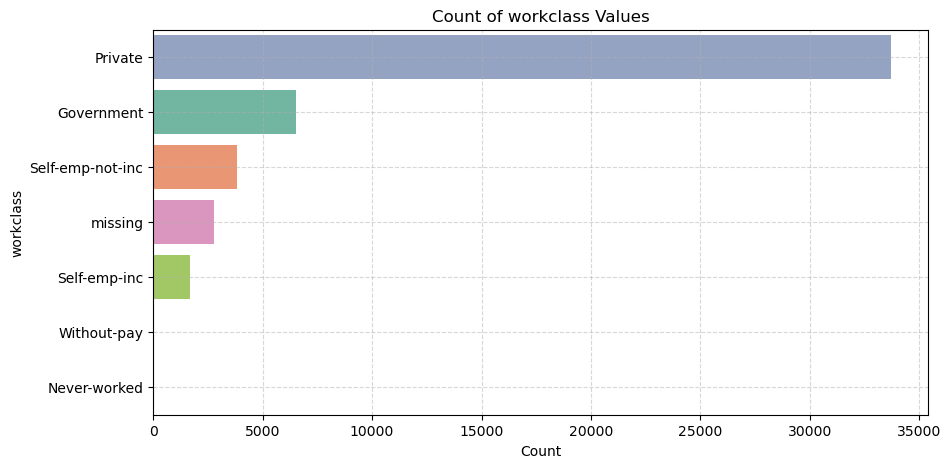

In [181]:
#plot workclass distribution
plot_column_values('workclass')

<u><h2>Observations :</u></h2>
- Dominance of the Private Sector : Roughly 70% of records list “Private” employment.
- “Government” comes  second at about 12–14% of the data.
- ~2,800 “missing” entries (~6% of the Data).
- “Without-pay” and “Never-worked” are extremely scarce (<1%).

<u><h2>Implications :</u></h2>
- Our Data is heavily skewed toward private-sector workers.
- Grouping “Without-pay” and “Never-worked” as "Other".



In [182]:
#grouping “Without-pay,” “Missing,” and “Never-worked” into a single  “Other” category in the workclass column
df['workclass'] = df['workclass'].replace(['Without-pay', 'Never-worked'], 'Other')

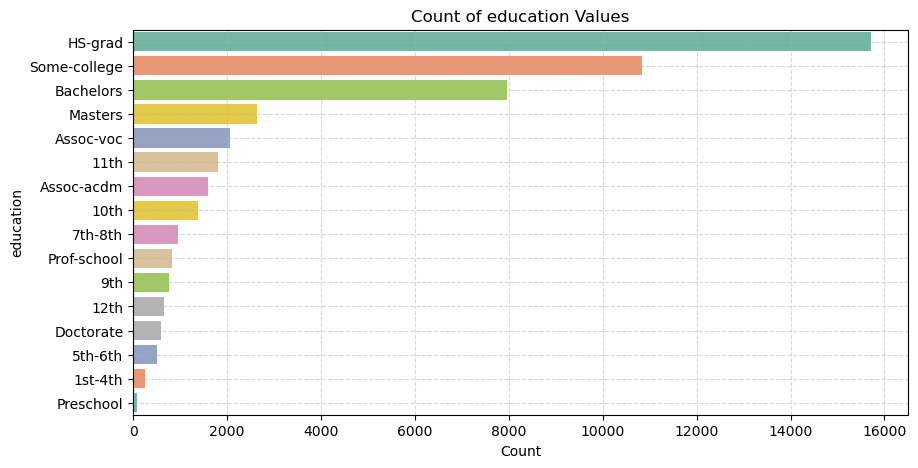

In [183]:
#plotting 'education' column distribution
plot_column_values('education')

<u><h2>Observations :</u></h2>
- Heavily skewed toward mid-levels

	•	HS-grad (~15 800, ~32 %) is the single largest bin, followed by Some-college (~11 000, ~22 %) and Bachelors (~8 000, ~16 %).

	•	Together, those top three account for ~70 % of your sample.
- Clear ordering

	•	Unlike nominal categorizations, these bins have a strict hierarchy—no need to treat them as unordered factors.

<u><h2>Implications :</u></h2>
- Using ordinal encoding on 'education' column.


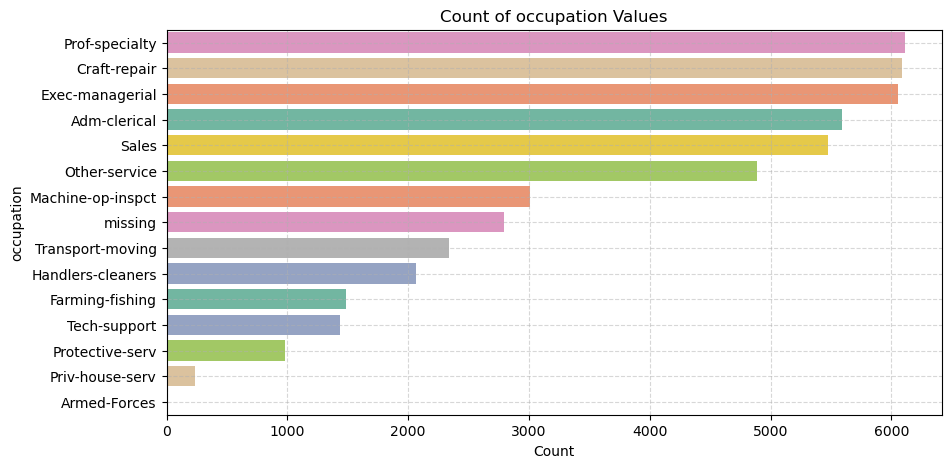

In [184]:
#plotting 'occupation' column distribution
plot_column_values('occupation')

<u><h2>Observations :</u></h2>
- Top professions dominate

	•	Prof-specialty, Craft-repair, Exec-managerial, Adm-clerical, Sales, and Other-service together make up roughly 60–65% of all records.
- Mid-frequency roles

	•	Machine-op-inspct (~6%), Transport-moving (~5%), and Handlers-cleaners (~4%) appear with moderate frequency.

- Rare categories

	•	Farming-fishing, Tech-support, and Protective-serv each fall between 2–3%, while Priv-house-serv (~0.5%) and Armed-Forces (<0.2%) are vanishingly small.


<u><h2>Implications :</u></h2>
- Reduce sparsity by grouping

	• We can collapse the very rare levels (Priv-house-serv, Armed-Forces, Protective-serv, Tech-support) into a single “Other” bucket.

In [185]:
df['occupation'] = df['occupation'].replace(['Armed-Forces', 'Priv-house-serv','Protective-serv','Tech-support'], 'Other-Rare')

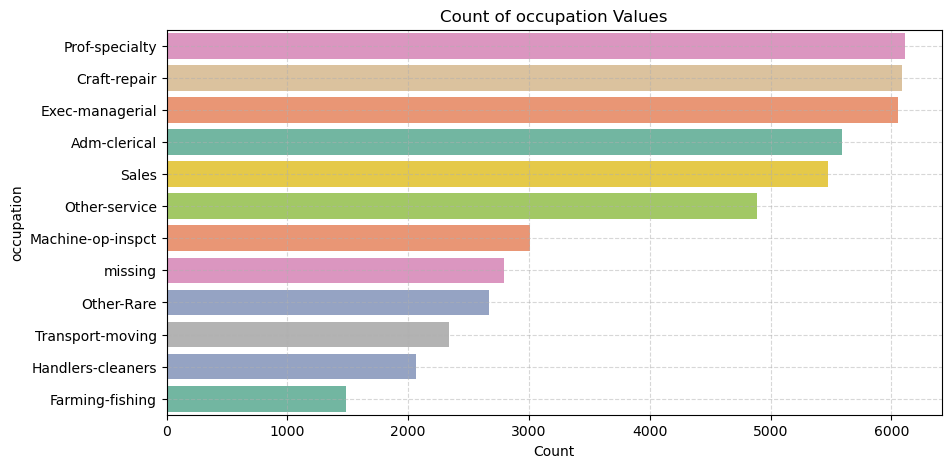

In [186]:
plot_column_values('occupation')

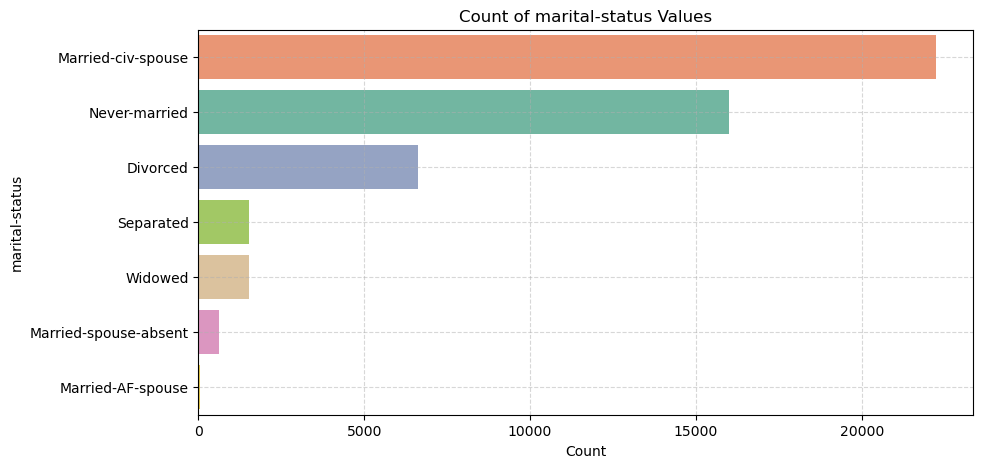

In [187]:
#ploting occupation distribution
plot_column_values('marital-status')

<u><h2>Observations :</u></h2>
- Dominant categories : Married-civ-spouse (~45%) and Never-married (~32.5%) together account for roughly 78% of all records.
- Mid-tier level : Divorced is the only other category in double digits at 13.6%.
- Small minorities : Separated and Widowed each appear in about 3.7% of rows.
- Very rare levels : Married-spouse-absent (~1.2%) and Married-AF-spouse (~0.1%) combined make up barely 1–2%.

<u><h2>Implications :</u></h2>
- Dimensionality reduction : We can group together the very rare categories : Married-spouse-absent,and Married-AF-spouse.




In [188]:
#grouping 'married-civ-spouse' and 'married-spouse-absent' into a single 'Other' category due to their low frequency
df['marital-status'] = df['marital-status'].replace(['Married-AF-spouse', 'Married-spouse-absent'], 'Other')

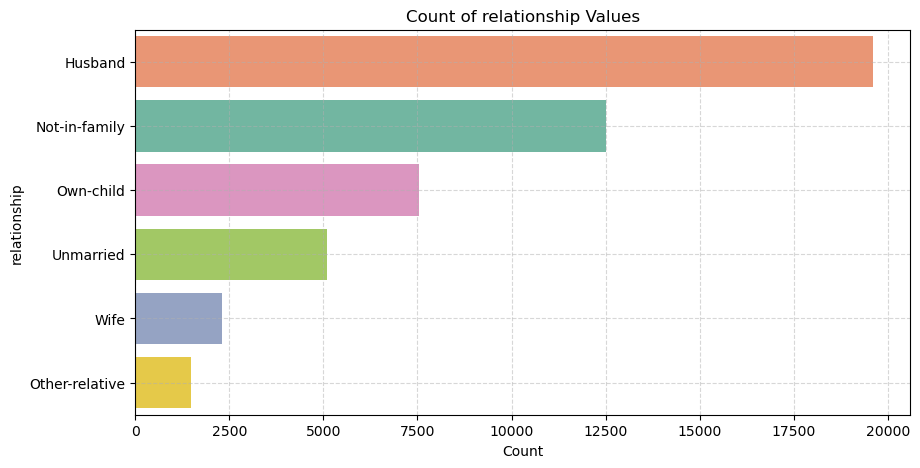

In [189]:
plot_column_values('relationship')

<u><h2>Observations :</u></h2>
- Husband is the most common relationship (≈19,800 records, ~40%).
- “Wife” is  relatively small (~5%)

<u><h2>Implications :</u></h2>
- Feature engineering : Group 'Husband' and 'wife' together to 'Spouse'.


In [190]:
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Spouse')

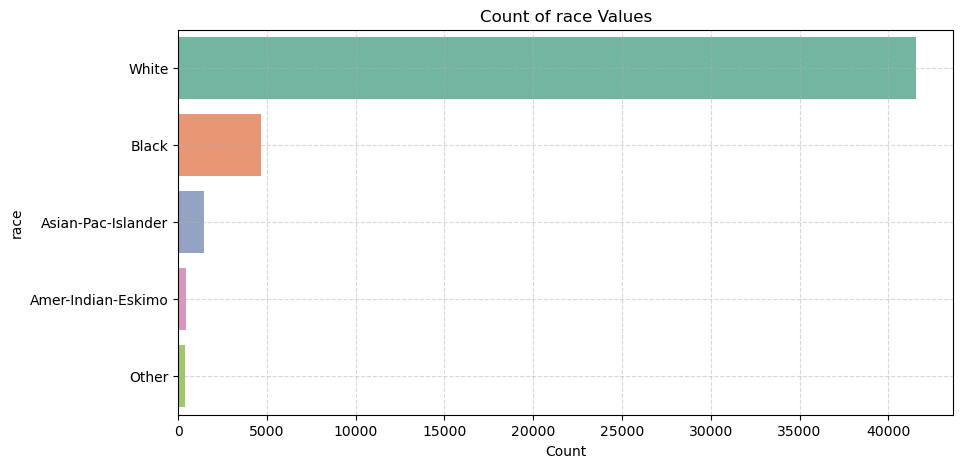

In [191]:
#plotting 'race' column distribution
plot_column_values('race')

<u><h2>Observations :</u></h2>
-  Our Data is dominated by 'White' which account for roughly 80–85%.
- Asian-Pac-Islander is only 3–4%, while Amer-Indian-Eskimo and Other are each under 1%.

<u><h2>Implications :</u></h2>
- Feature engineering : group 'Amer-Indian-Eskimo' and 'Other' into a single “Other-Race” bucket.

In [192]:
df['race'] = df['race'].replace(['Amer-Indian-Eskimo', 'Other'], 'Other-Race')

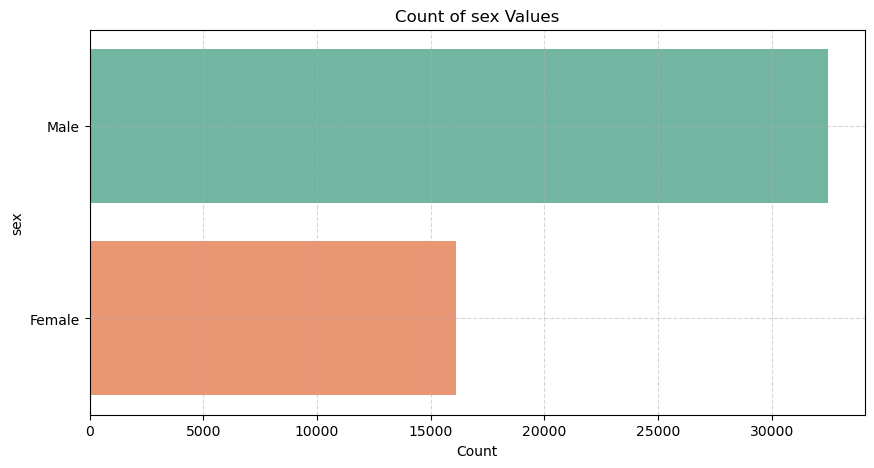

In [193]:
#plotting 'sex' column distribution
plot_column_values('sex')

<u><h2>Observations :</u></h2>
- Male makes up about 67% of the Data.
- Female accounts for the remaining 33%.


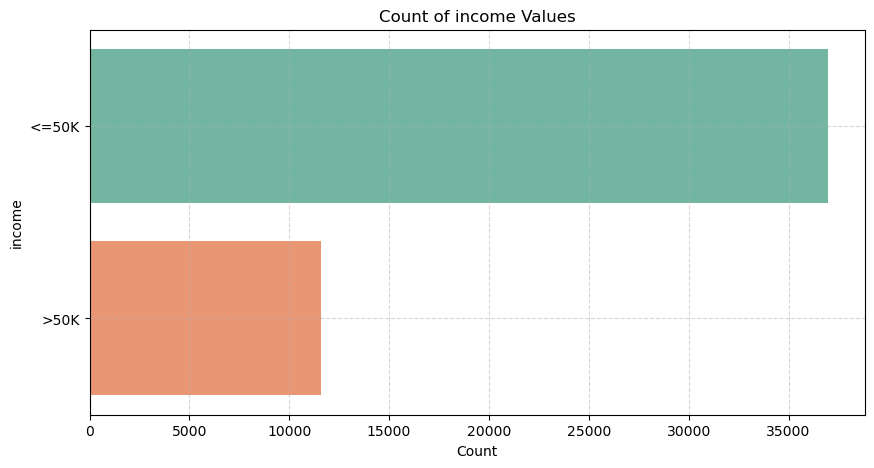

In [194]:
#plotting 'income' column distribution
plot_column_values('income')

<u><h2>Observations :</u></h2>
- “<=50k” constitutes roughly 76% of the data (~37 000 records).
- “>50k” makes up only 24% (~11 600 records).

## Plotting the numerical values

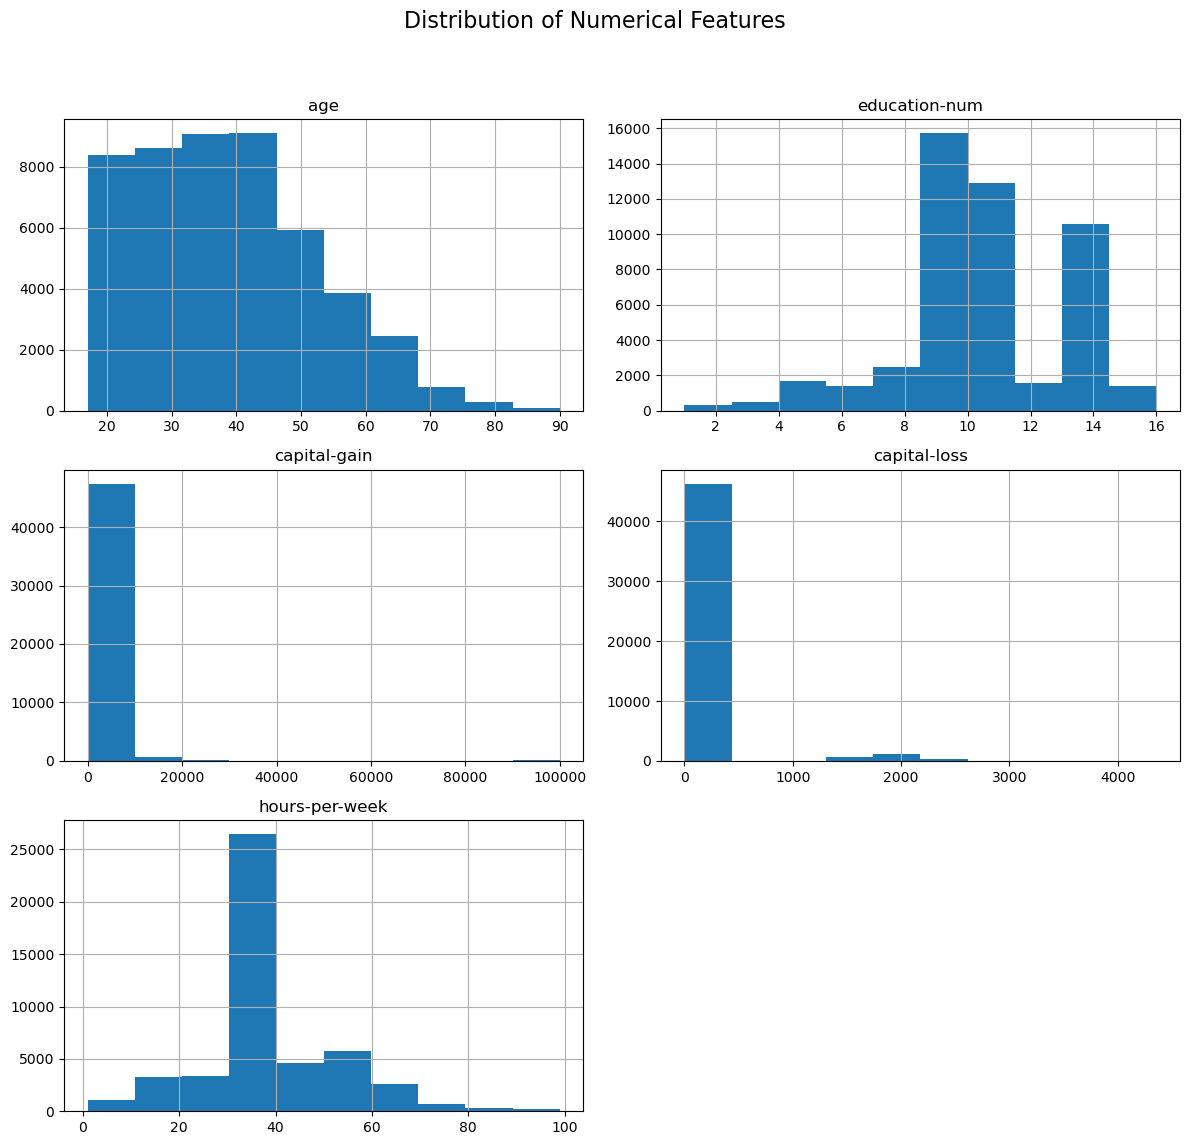

In [195]:
#plotting a histogram for each numerical column in numerical columns to see the distribution of values
df[numerical_columns].hist(
    figsize=(12, 12),

)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

In [196]:
df['capital-gain'].value_counts().sort_index()

capital-gain
0        44553
114          8
401          5
594         52
914         10
991          6
1055        37
1086         8
1111         1
1151        13
1173         5
1264         2
1409        10
1424         4
1455         4
1471         9
1506        24
1639         1
1731         1
1797        10
1831         9
1848         9
2009         3
2036         5
2050         5
2062         3
2105        15
2174        74
2176        31
2202        28
2228         5
2290        10
2329         7
2346         8
2354        21
2387         1
2407        25
2414        10
2463        15
2538         5
2580        20
2597        29
2635        14
2653        11
2829        41
2885        30
2907        18
2936         4
2961         3
2964        14
2977        11
2993         3
3103       152
3137        51
3273         7
3325        81
3411        34
3418         8
3432         4
3456         6
3464        33
3471        11
3674        22
3781        16
3818        11
3887        

<u><h3>Observations :</u></h3>
- People above 8th grade are  dominating the data.
- Capital-gain and Capital loss are distributed mostly around zero.
- More than Half of the people (~52%) are working between 30-40 hours per week.
- The data consists mostly from people at the ages : 18-60.
- Generally, the data is very skewed.

<u><h3>Implications :</u></h3>

- Due to our data being very skewed, we should consider scaling it using standartization/normalization/another scaling algorithm.


# Multivariate plots
### To further understand our data we will use more visualization tools 

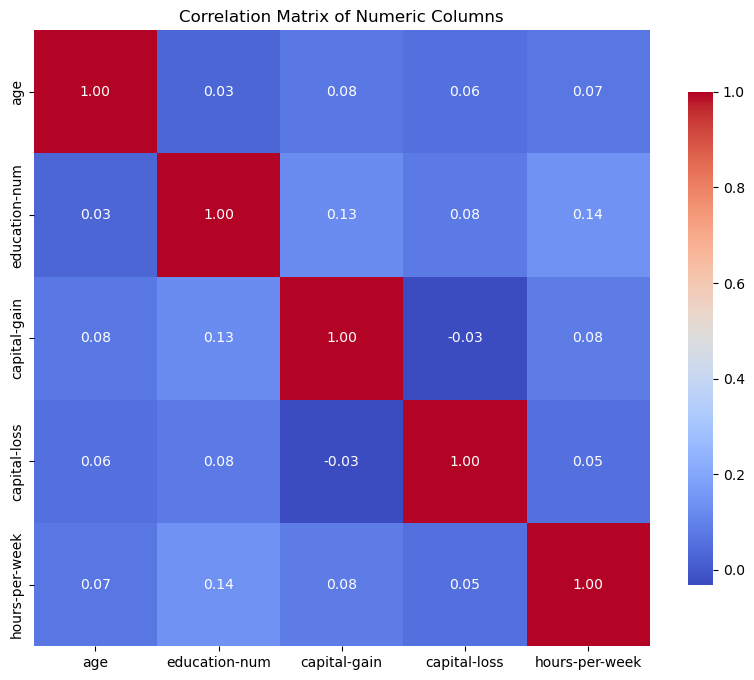

In [197]:
#plotting the correlation matrix of the numeric columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

<h2><u>Observation</u>:
 No seen correlation between numerical columns.</h2>


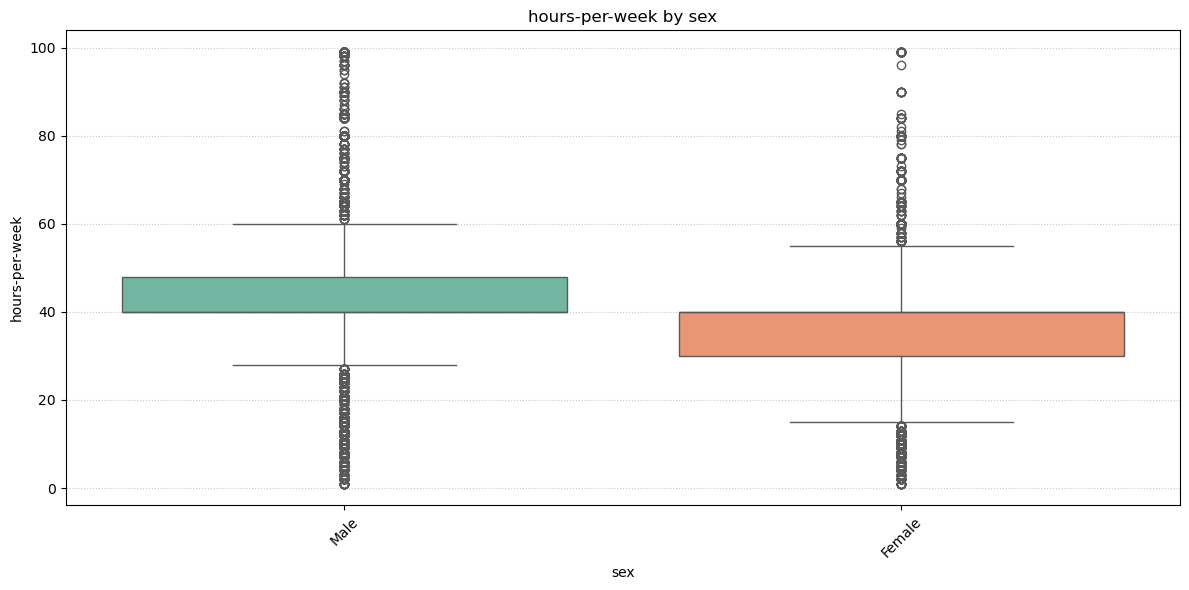

In [198]:
# writing a function for a numerical vs categorical catplot
def Bivariate_catplot(numerical_col, categorical_col, df=df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categorical_col, y=numerical_col, data=df,hue=categorical_col, palette='Set2')
    plt.title(f'{numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Plotting numerical vs categorical features
Bivariate_catplot('hours-per-week', 'sex')




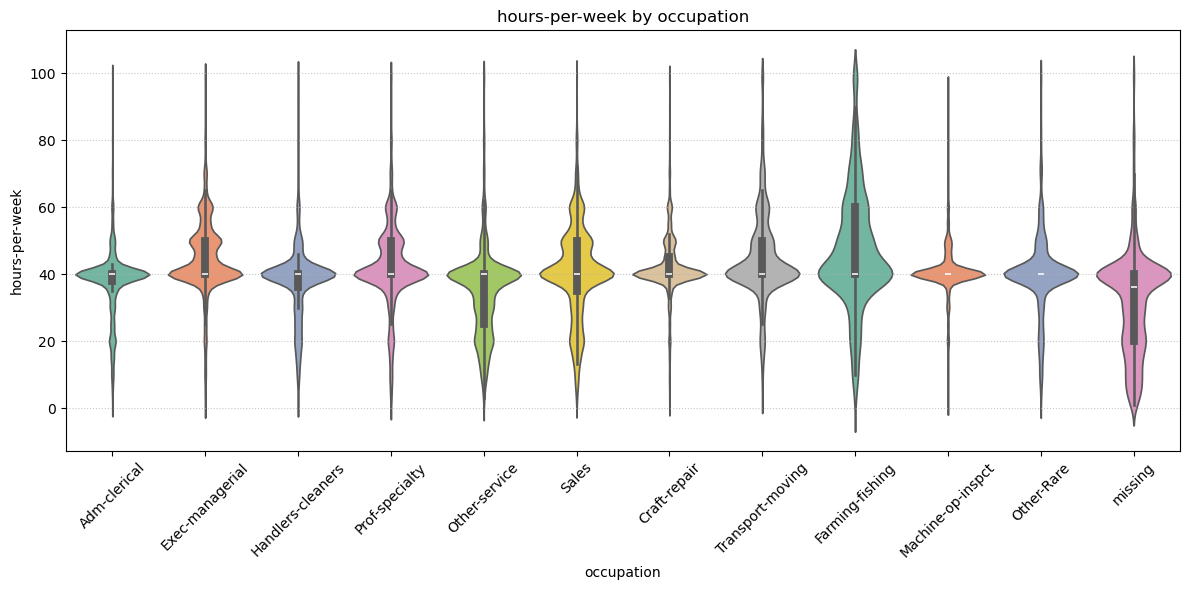

In [199]:
#writing a function to plot Bivariate violin plot
def Bivariate_violinplot(numerical_col, categorical_col, df=df):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=categorical_col, y=numerical_col, data=df, hue=categorical_col, palette='Set2')
    plt.title(f'{numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

Bivariate_violinplot('hours-per-week', 'occupation')




<h2><u>Observations:</h2></u>

- 	Feature Engineering
	•	We can  create a new feature called “hour‐type”:
	1.	Part-time (< 30 hrs),
	2.	Full-time (30–45 hrs),
	3.	Overtime (45–60 hrs),
	4.	Extreme (60+ hrs).
	
	•	Then examine how each workclass falls into these hour‐type buckets. For instance, most state-gov workers would land in “Full-time,” while many self-emp-inc workers are in “Overtime” or “Extreme.”




In [200]:
#feature engineering - creating new feature called hour-type based on hours-per-week
def hour_type(hours):
    if hours < 30:
        return 'Part-time'
    elif 30 <= hours < 45:  
        return 'Full-time'
    elif 45<= hours <= 60:
        return 'Over-time'
    else:
        return 'Extreme'
# Apply the function to create a new column that categorizes hours-per-week ordinally from part-time to extreme
df['hour-type'] = df['hours-per-week'].apply(hour_type)
#categorize 'hour-type' column ordinally
hour_type_order = ['Part-time','Full-time','Over-time','Extreme']
# Convert 'hour-type' to a categorical type with the specified order
df['hour-type'] = pd.Categorical(df['hour-type'], categories=hour_type_order, ordered=True)


In [203]:
#checking if 'hour-type' column is created and has the correct order
print(df['hour-type'].dtype)
print("Category order:", list(df['hour-type'].cat.categories))

category
Category order: ['Part-time', 'Full-time', 'Over-time', 'Extreme']


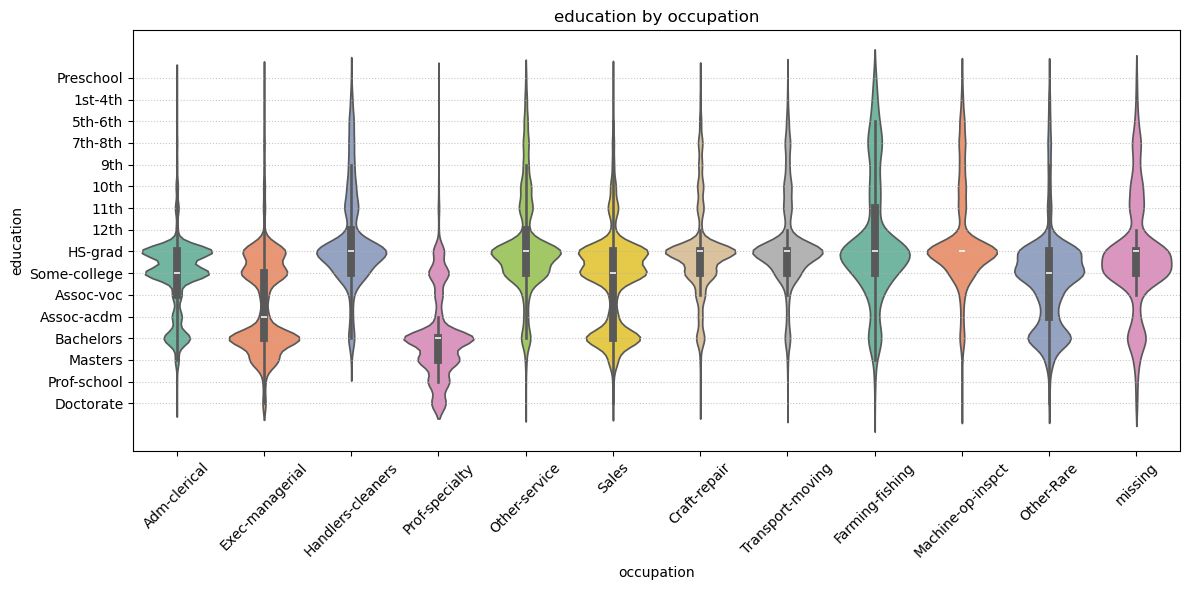

In [204]:
Bivariate_violinplot('education', 'occupation')

<h2><u>Observations:</h2></u>


- Low-education roles (Preschool–12th): Predominantly appear in Handlers-cleaners, Machine-op-inspct, and Transport-moving, with very thin densities in Exec-managerial and Prof-specialty.

- HS-grad: Found across all occupations but peaks in Sales, Other-service, and Adm-clerical, reflecting entry-level or administrative positions.

- Some-college/Associate (Some-college–Assoc-acdm/voc): Concentrated in Private, Exec-managerial, Sales, and Transport-moving, indicating that many mid-level roles require some post-secondary education.

- Bachelor’s or Higher: Densest in Exec-managerial, Prof-specialty, and Protective-serv, with a long right tail into Doctorate at Prof-specialty.

- missing (Unknown education): Sparse noise across all occupations—should be treated as “Unknown” or imputed.

<h2><u>Implications:</h2></u>
Education and occupation correlate strongly:

- Professional/Managerial roles almost exclusively require Bachelor’s or higher.

- Blue-collar/Trade occupations (Machine-op, Handlers, Transport) skew lower (≤ HS or Some-college).

- Service roles (Sales, Other-service) span HS-grad through Bachelor’s.

<u>Feature engineering :</u>

We can encode an education_level feature , then incorporate that alongside occupation to create joint feature interactions:
1. Less than HS : Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th
2. HS Graduate : HS-grad
3. Some College / Assoc : Some-college, Assoc-voc, Assoc-acdm.
4. Bachelor’s or Higher : Bachelors, Masters, Prof-school, Doctorate.



## Creating an education-group column as we implied earlier, for Feature engineering purposes.

Text(0.5, 1.0, 'Count of Education Groups')

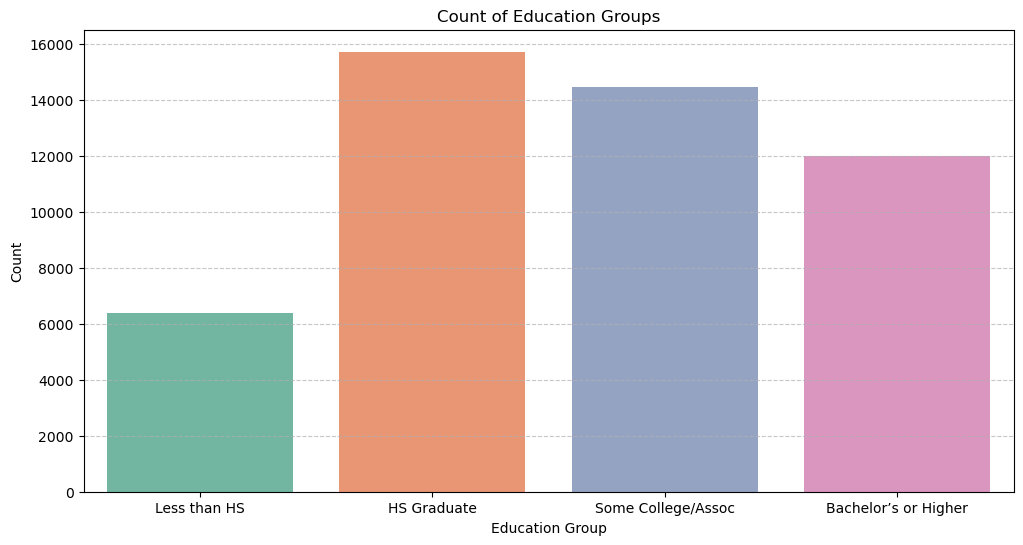

In [205]:
#mapping education levels to education-geoup
education_to_group = {
    # Less than HS
    'Preschool':               'Less than HS',
    '1st-4th':                 'Less than HS',
    '5th-6th':                 'Less than HS',
    '7th-8th':                 'Less than HS',
    '9th':                     'Less than HS',
    '10th':                    'Less than HS',
    '11th':                    'Less than HS',
    '12th':                    'Less than HS',
    # HS Graduate
    'HS-grad':                 'HS Graduate',
    # Some College / Assoc
    'Some-college':            'Some College/Assoc',
    'Assoc-voc':               'Some College/Assoc',
    'Assoc-acdm':              'Some College/Assoc',
    # Bachelor’s or Higher
    'Bachelors':               'Bachelor’s or Higher',
    'Masters':                 'Bachelor’s or Higher',
    'Prof-school':             'Bachelor’s or Higher',
    'Doctorate':               'Bachelor’s or Higher'
}
# Map the education levels to the new groups
df['education-group'] = df['education'].map(education_to_group)
# Convert the new education-group column to a categorical type with an ordinal order
education_group_order = ['Less than HS','HS Graduate','Some College/Assoc', 'Bachelor’s or Higher']
df['education-group'] = pd.Categorical(df['education-group'], categories=education_group_order, ordered=True)

#checking the value counts in the 'education-group' column
plt.figure(figsize=(12, 6))
sns.countplot(x='education-group', data=df, order=education_group_order,hue='education-group', palette='Set2')
plt.xlabel('Education Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Count of Education Groups')

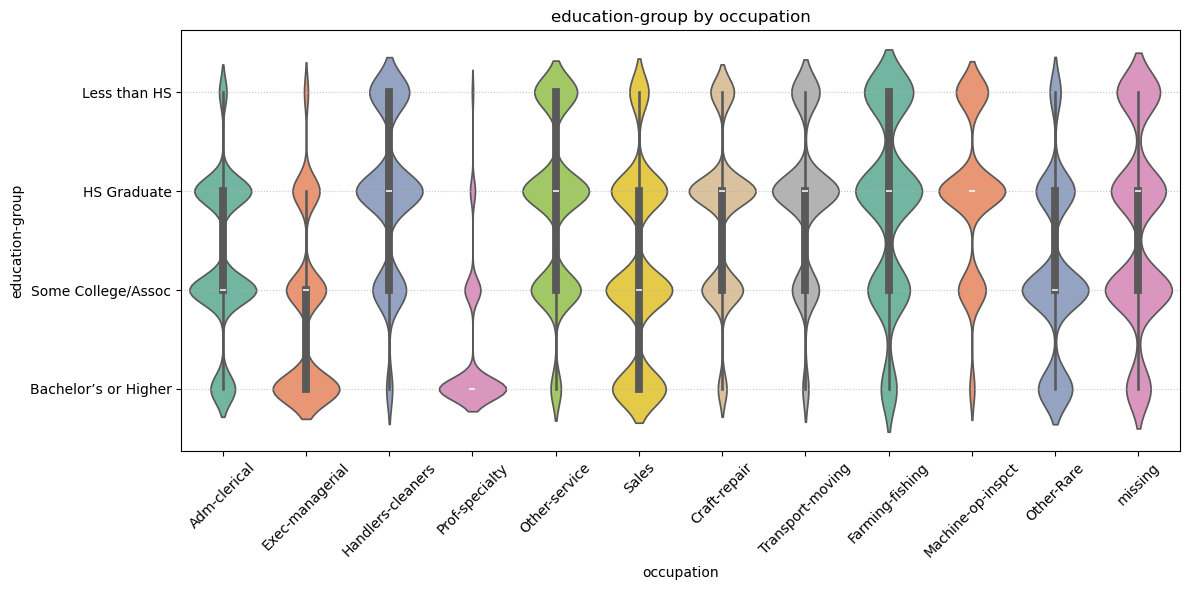

In [206]:
Bivariate_violinplot('education-group', 'occupation')


<h2><u>Observations:</h2></u>

-  Prof-specialty & Exec-managerial: Nearly 100 % “Bachelor’s or Higher,” with almost no “HS Graduate” or below.

- Other-Rare: Broadly mixed across all four education buckets—reflects true heterogeneity.

- Missing education: Lightly scattered in every occupation—worth flagging as its own category.

<h2><u>Implications:</h2></u>

- Occupation–education interactions will sharply separate “high-skill” (Prof-specialty, Exec-managerial + Bachelor’s+) from “mid-skill” (Craft-repair, Adm-clerical + Some College/Assoc) and “low-skill” 

    (Handlers, Machine-op, Farming + < HS/HS) clusters.


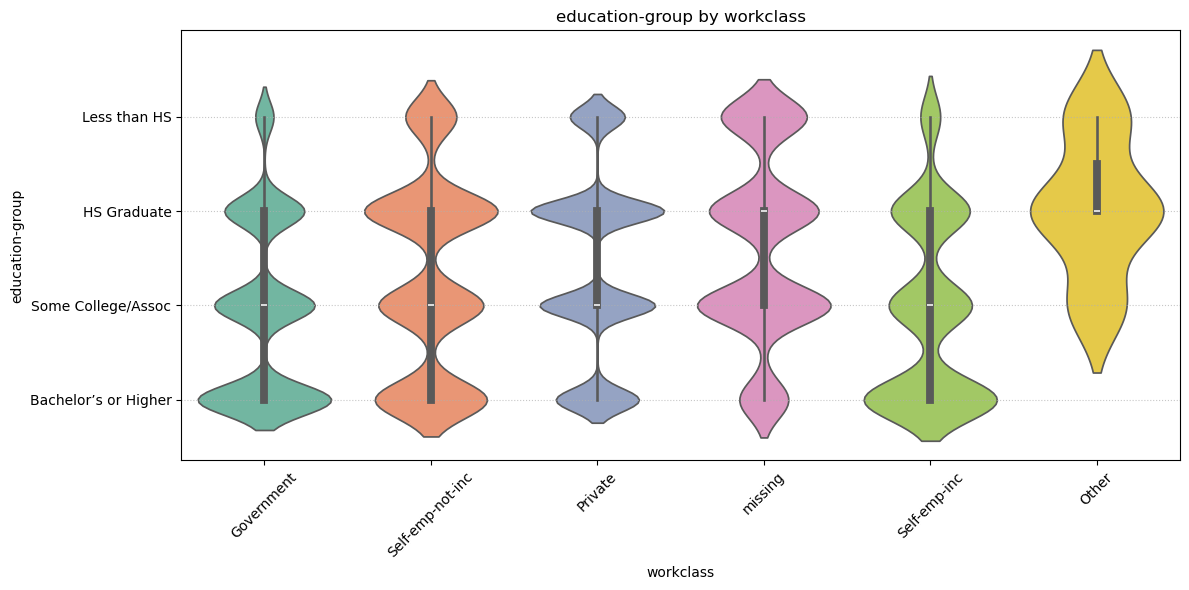

In [207]:
Bivariate_violinplot('education-group', 'workclass')


<h2><u>Observations:</h2></u>

- Self-emp-inc (incorporated business owners) skew heavily toward Bachelor’s or Higher, with substantial density at Masters and some Doctorate, and very few in the <HS categories.
- Government workers have a tight concentration at HS-grad and Bachelors, with a median around HS-grad–Some-college. Very few have below HS or advanced degrees.
- Private sector has 2 peaks : a large peak at HS-grad/Some-college and a second peak at Bachelors, indicating many entry-to-mid-level education roles plus a professional subset.
- Other (Without-pay/Never-worked) is spread across nearly all education levels, peaking at HS-grad but with noise—another sign that this bucket is noisy. 

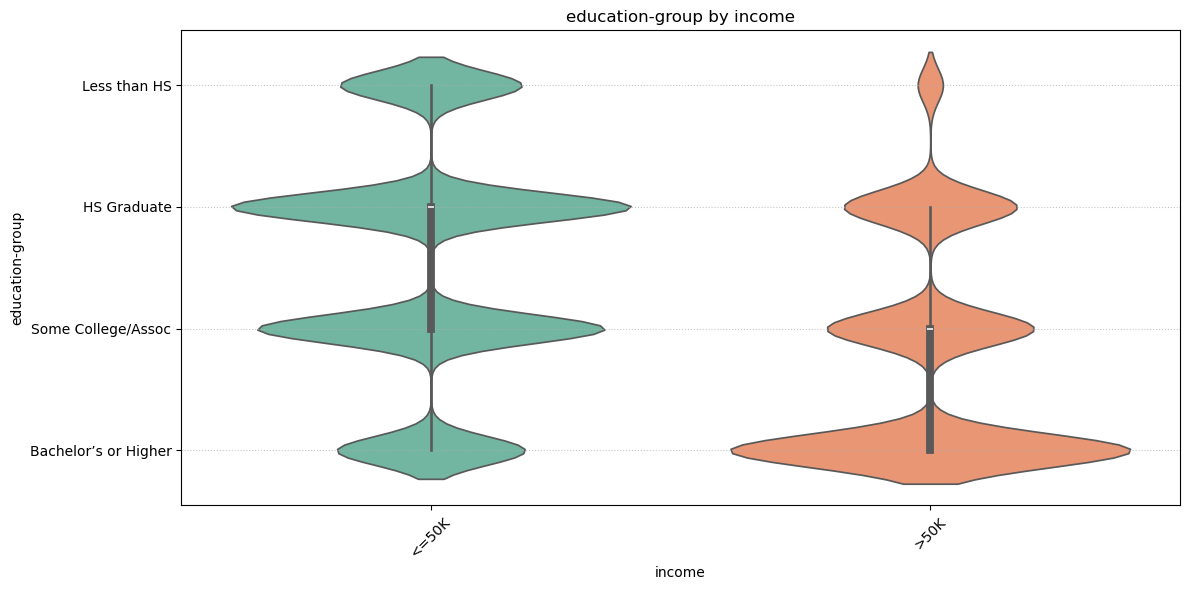

In [208]:
# Plotting numerical vs categorical features using violin plots
Bivariate_violinplot('education-group', 'income')

<h2><u>Observations:</h2></u>

- Low-income (<=50K): The violin is heavily weighted toward HS-grad and Some-college, with a median at HS-grad (9). Minor densities appear at Associate and Bachelor’s levels, but advanced degrees are extremely rare.

- High-income (>50K): The distribution shifts right dramatically. The peak density moves to Bachelors and Masters, with a long tail into Prof-school and Doctorate. The median education level for >50K is around Bachelors (13).

- Gap between groups: There is almost no overlap at the highest education tiers—doctoral and professional school graduates are virtually all in the >50K bracket, while HS-grad and below are almost exclusively <=50K.

<h2><u>Implications:</h2></u>
- Education level is a clear seperator of income classes, can be helpfull for clustering.




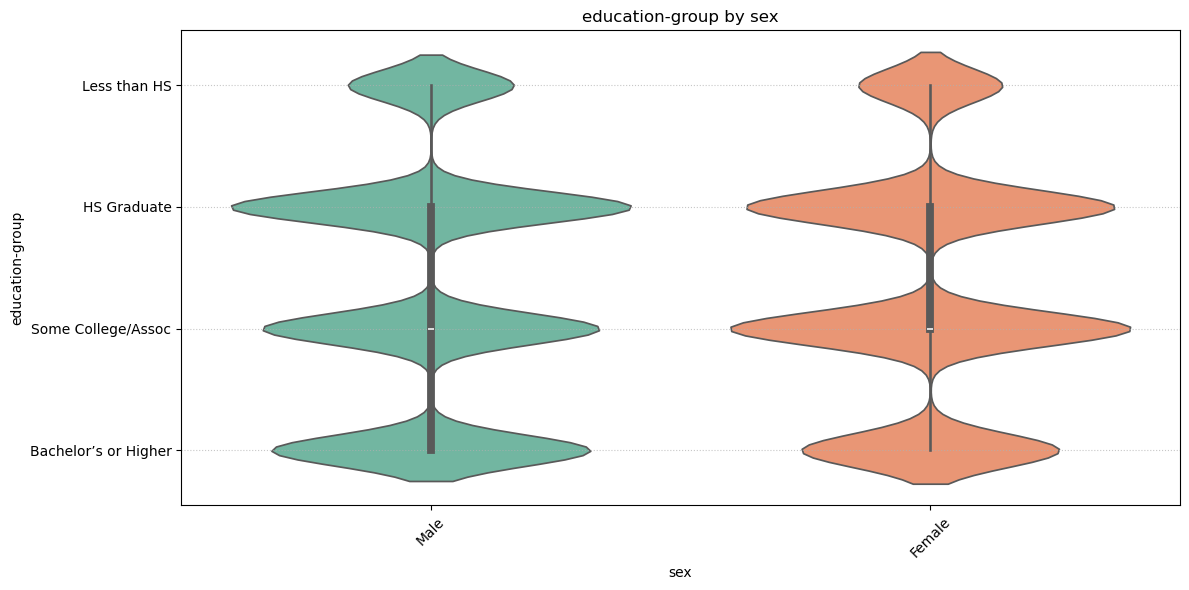

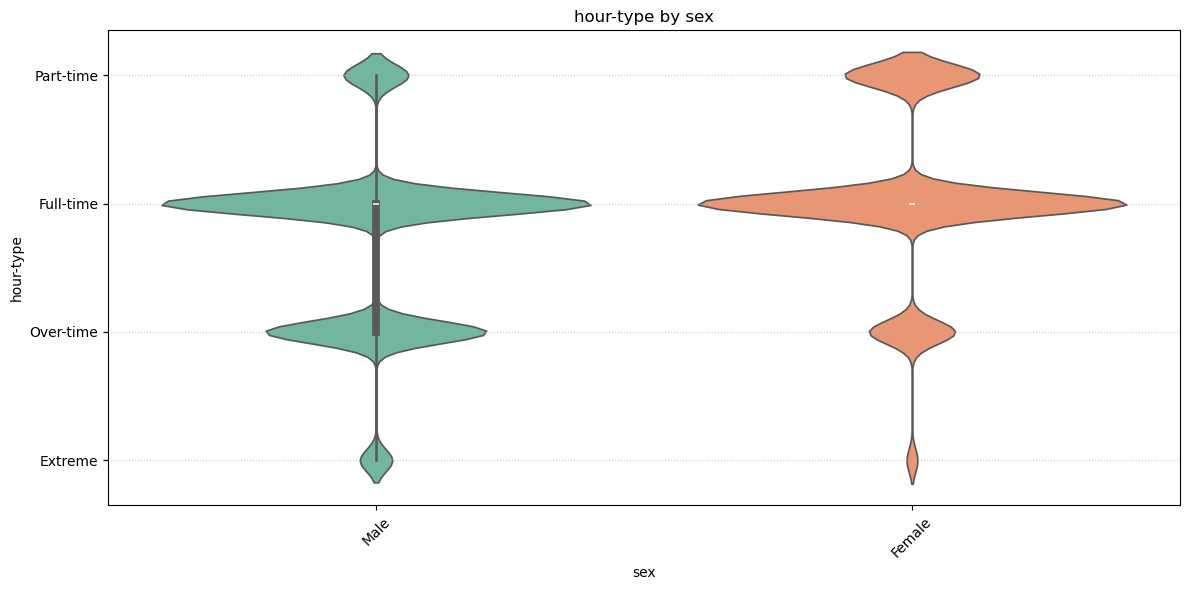

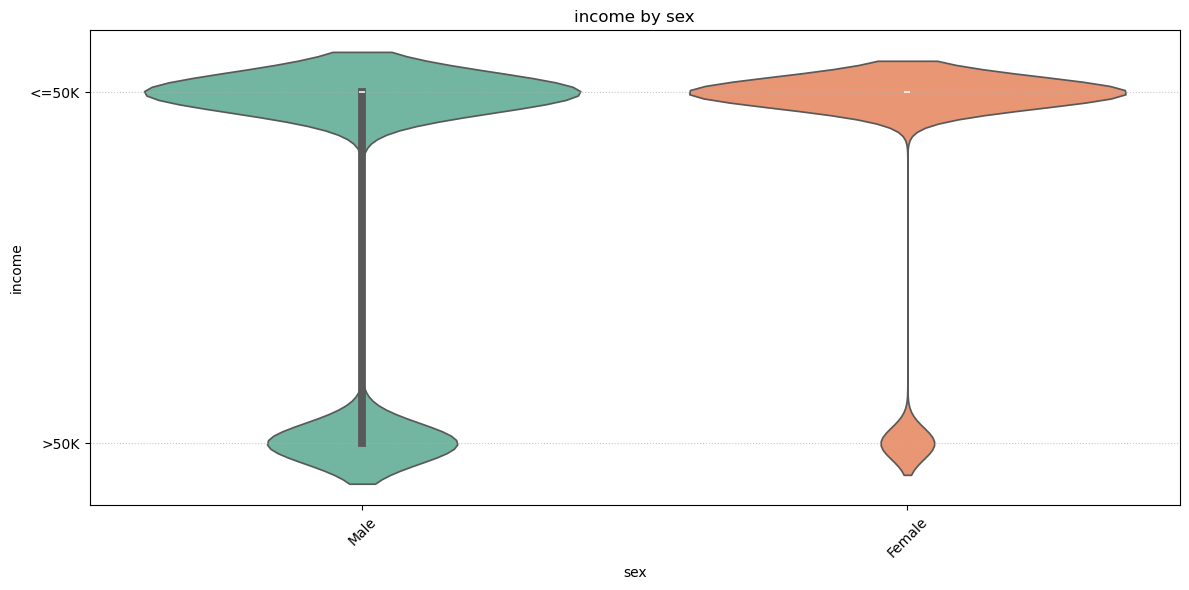

In [209]:
Bivariate_violinplot('education-group', 'sex')
Bivariate_violinplot('hour-type', 'sex')
Bivariate_violinplot('income', 'sex')

<h2><u>Observations:</h2></u>

Education-group by Sex

	•	Women show a slightly higher density in the Bachelor’s or Higher bucket.
	•	Men have a marginally larger share in the HS Graduate and Less than HS groups.

Hour-type by Sex

	•	Full-time is the dominant category for both, but especially for men.
	•	Women have a noticeably thicker “Part-time” band.
	•	Overtime and Extreme hours appear more frequently among men.

Income by Sex

	•	The vast majority of both sexes earn ≤50 K, with women even more concentrated there.
	•	Men have a relatively larger slice of the >50 K group.


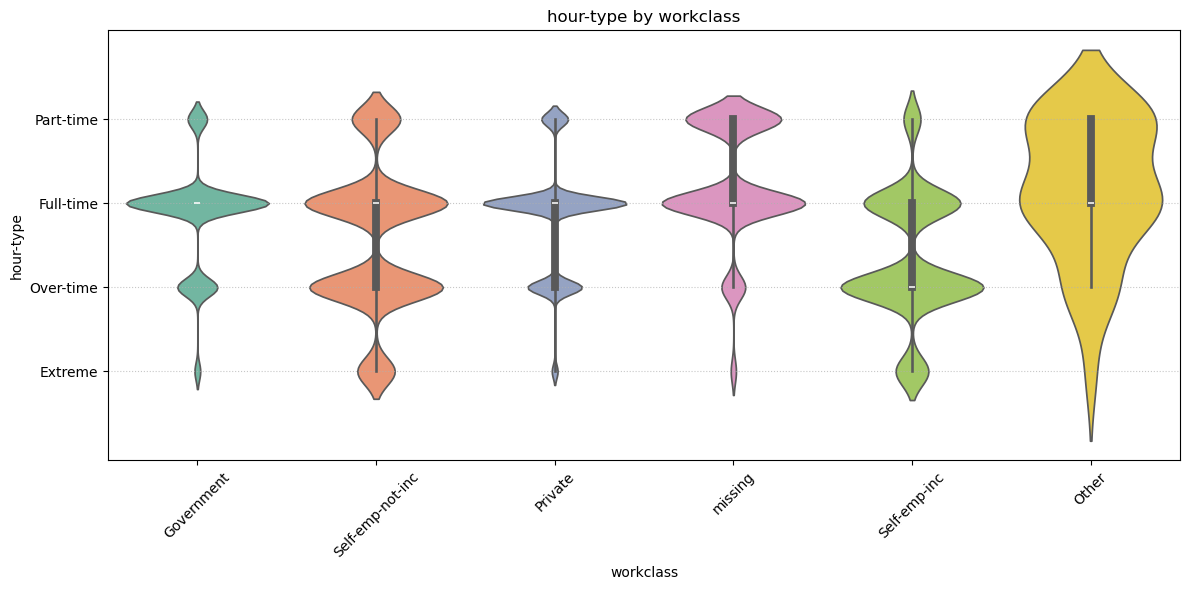

In [210]:
#checking for cluster in the 'workclass' vs hour-type  plot
Bivariate_violinplot('hour-type', 'workclass')

<h2><u>Observations:</h2></u>

- Government: Almost entirely Full-time. The violin is very narrow at Part-time, Over-time, and Extreme, with the median pinned at Full-time.

- Private: Predominantly Full-time, with some Part-time and moderate Over-time, but virtually no Extreme.

- Self-emp-not-inc: Broad distribution across Full-time, Over-time, and some Extreme, indicating varied schedules.

- Self-emp-inc: Right‐skewed with heavy density in Over-time and Extreme, fewer Full-time, minimal Part-time.

- Other (Missing/Without-pay/Never-worked): Highly variable across all bins, suggesting these should be grouped or treated as noisy data.

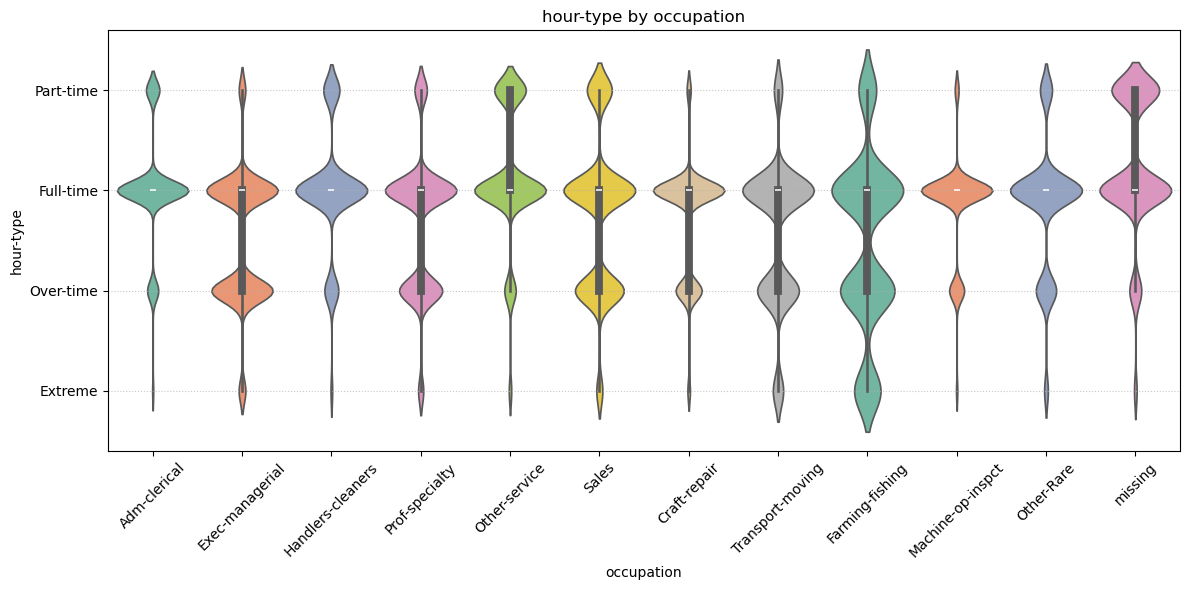

In [211]:
Bivariate_violinplot('hour-type', 'occupation')

<h2><u>Observations:</h2></u>


- Adm-clerical, Handlers-cleaners, Sales, Other-service: these occupations cluster tightly at Full-time, with very narrow tails into Part-time and almost no overtime or extreme hours.

- Exec-managerial & Prof-specialty: there’s a wider spread. The median sits at Full-time, but substantial density extends into Over-time (45–60 hrs) and even the Extreme bin (>60 hrs), reflecting managerial/professional roles with long hours.

- Machine-op-inspct & Tech-support: moderate distribution across Full-time and slight Over-time, with minimal Extreme; they resemble private-sector norms but with slightly more overtime.

- Transport-moving & Protective-serv: these display wider over-time tails (45–70 hrs), indicating shift or emergency work requiring longer hours, with some Extreme outliers.

- Farming-fishing: very right-skewed—strong density in Over-time and heavy Extreme, with the violin bulging most in the 60–80 hr range, capturing peak seasonal demands.

- Armed-Forces & Priv-house-serv: small sample sizes but both show high variability: Armed-Forces has a spread from Part-time (few) up to Extreme, Priv-house-serv clusters around Full-time with a moderate Over-time tail.

- missing (Unknown occupation): noise across all bins—should likely be grouped as “Unknown” or dropped for modeling.

<h2><u>Implications:</h2></u>


Occupations naturally segment by hour-type:

- Stable 40-hr roles (Adm-clerical, Sales, Other-service, Handlers-cleaners).

- Flexible/overtime roles (Exec-managerial, Prof-specialty, Transport, Protective, Farming).

- Noisy/unknown (missing).

- For clustering, we can encode a feature like occupation_group based on these hour-type patterns (“Administrative,” “Professional,” “Trade,” “Agricultural,” “Unknown”).



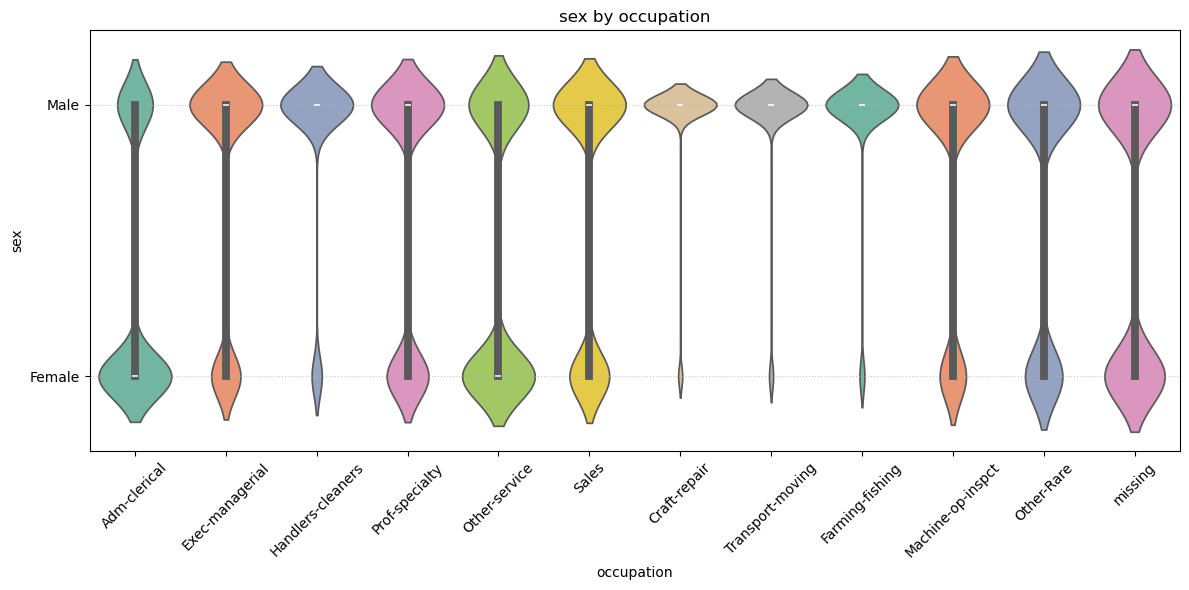

In [212]:
Bivariate_violinplot('sex', 'occupation')

# Question : maybe we can explore the Female part of the Data ?

In [60]:
'''
df_female = df[df['sex'] == 'Female']
numerical_vs_categorical_violinplot('education-group', 'occupation',df_female)
'''

"\ndf_female = df[df['sex'] == 'Female']\nnumerical_vs_categorical_violinplot('education-group', 'occupation',df_female)\n"

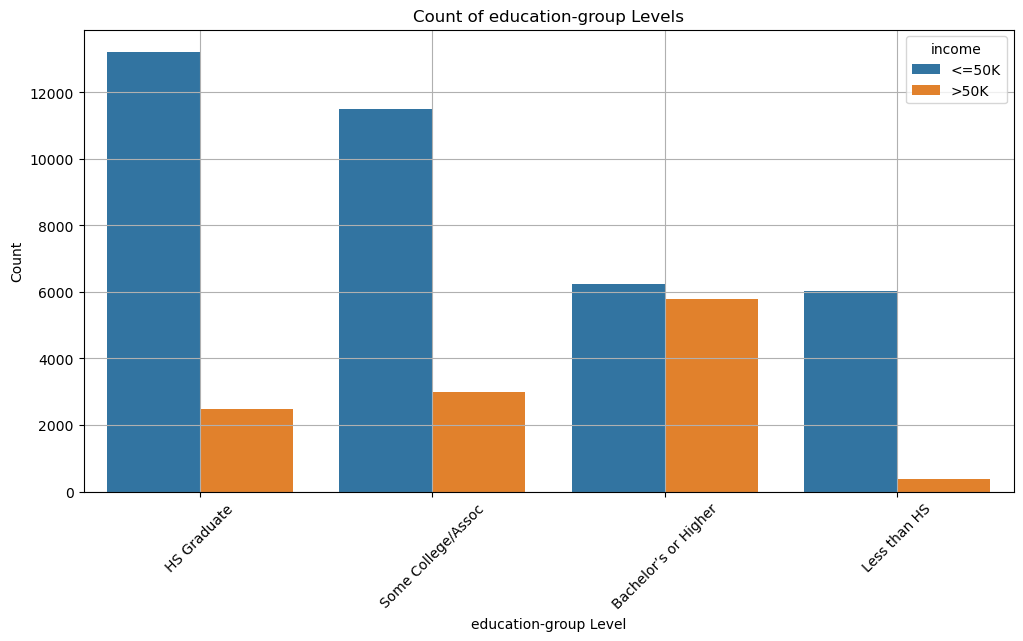

In [213]:
plot_column_distribution('education-group')

<h2><u>Observations:</h2></u>
- We can see a clear correlation between education levels (Group-wise) and the number of records of '>50k'. (Less Than HS < HS Graduate < Some College/Assoc < Bachelor's or Higher)
- Feature engineering: Our four education buckets capture a strong monotonic relationship with income.

<h2><u>Implications:</h2></u>
- Thought - Education as a key segmentation axis: Clusters will naturally separate into “Low-education low-earners,” “Mid-education mixed-earners,” and “High-education high-earners.”

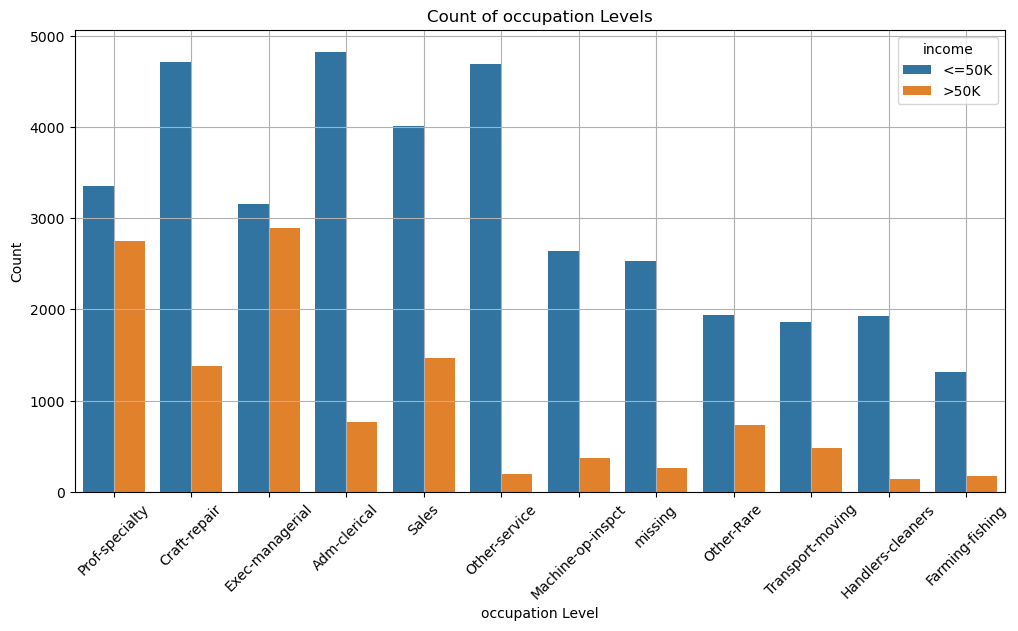

In [214]:
plot_column_distribution('occupation')

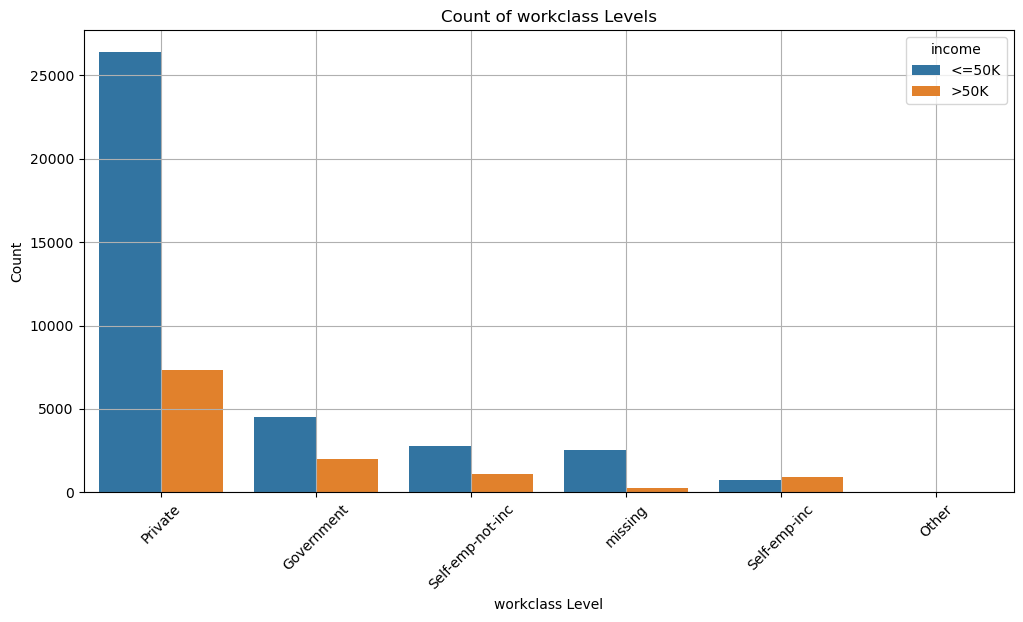

In [215]:
plot_column_distribution('workclass')

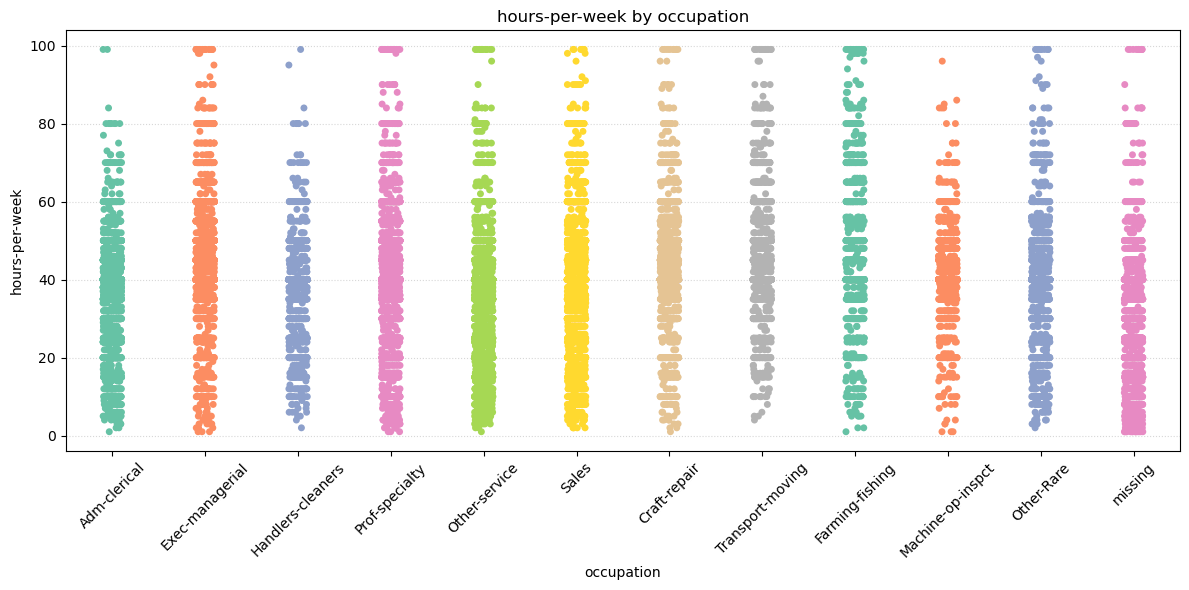

In [216]:
#writing a function to plot a numercal vs categorical features using a strip plot
def numerical_vs_categorical_stripplot(numerical_col, categorical_col):
    plt.figure(figsize=(12, 6))
    sns.stripplot(x=categorical_col, y=numerical_col, data=df, jitter=True, hue=categorical_col, palette='Set2')
    plt.title(f'{numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()
# Plotting numerical vs categorical features using strip plots
numerical_vs_categorical_stripplot('hours-per-week', 'occupation')



Observations:
- The most dense occupation in the overtime-extreme hours area is 'Farming-Fishing'
- The most dense oc

<u><h3> Observation :</u></h3>
No strong correlation between the numeric values in the Dataset.

# ____________________________________________________________

### Lets calculate the number of outliers using the IQR method and see whether we should drop the outliers

In [217]:
numerical_columns.remove('education-num')  # Remove 'education-num' as it's not needed anymore
numerical_columns.remove('hours-per-week')  # Remove 'hours-per-week' as it's not needed anymore

In [218]:
df_raw = df.copy()  # Keep a copy of the raw DataFrame before scaling

In [219]:
#lets write a function to calculate the IQR and print the number of outliers
def calculate_iqr_outliers(df, numerical_columns):
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a mask for outliers
    outlier_mask = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)
    return outlier_mask

In [220]:
#removing the outliers using the IQR method
print("IQR outliers:\n", calculate_iqr_outliers(df, numerical_columns).sum())
#print the percentage of outliers
outlier_percentage = (calculate_iqr_outliers(df, numerical_columns).sum()/ len(df)) * 100
print("Percentage of outliers in numeric columns:")
print(outlier_percentage.round(2), "%")

IQR outliers:
 age              214
capital-gain    4015
capital-loss    2275
dtype: int64
Percentage of outliers in numeric columns:
age             0.44
capital-gain    8.27
capital-loss    4.68
dtype: float64 %


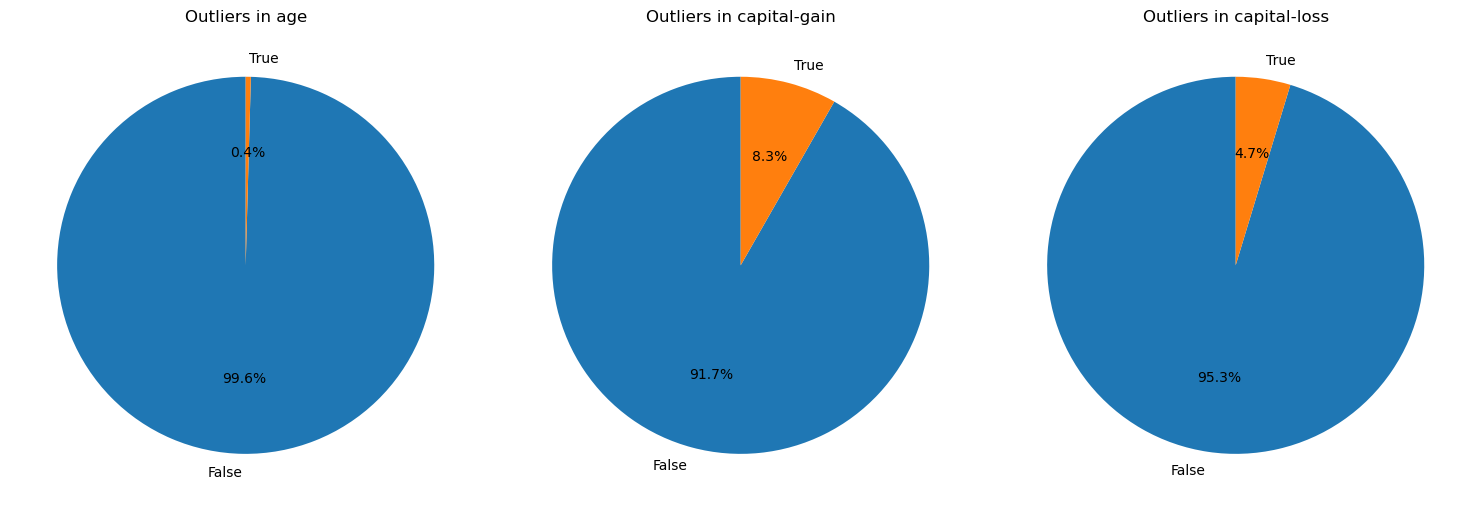

In [221]:
# plotting pie chart for every numeric column to see the distribution of outliers in a subplot
plt.figure(figsize=(15, 10))    
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df, numerical_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column}')
plt.tight_layout()
plt.show()


## We will drop all the outliers thats  less than 5 %
## We will use log transform to normalize the outliers that less than 10%


Number of outliers after removal:
 age             25
capital-gain     0
capital-loss     0
dtype: int64 rows


/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_80919/3673770605.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outlier_mask['capital-gain'] ]
/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_80919/3673770605.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outlier_mask['capital-loss'] ]


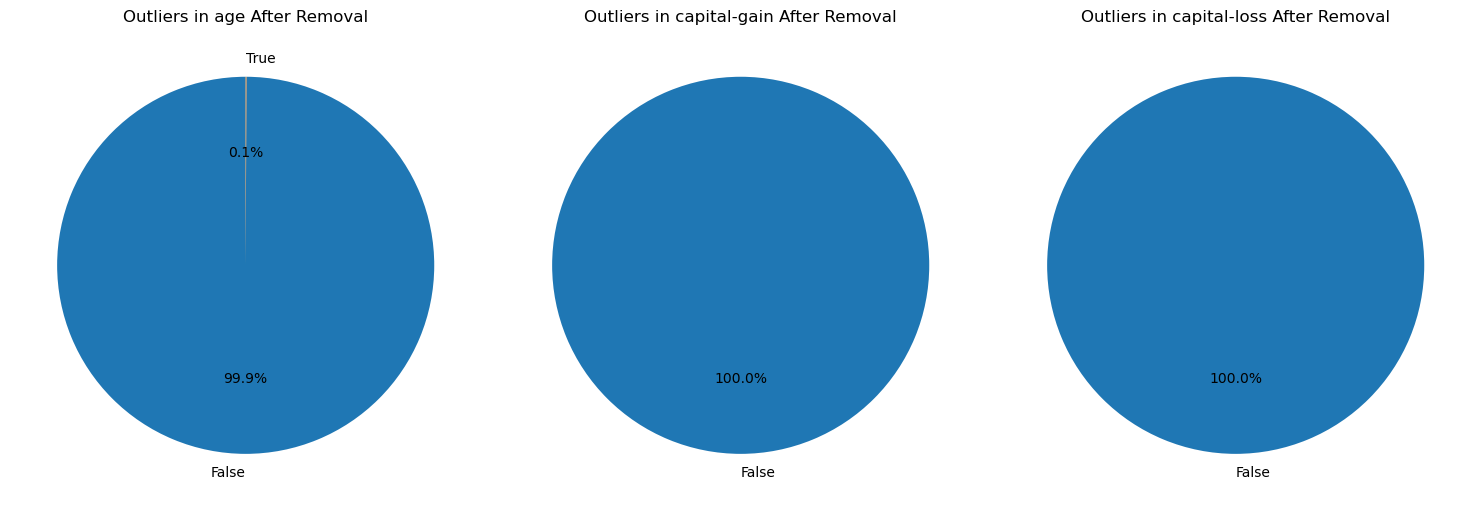

In [222]:
outlier_mask = calculate_iqr_outliers(df, numerical_columns)
#removing the outliers from 'age' 
df = df[~outlier_mask['age'] ]
#removing the outliers from 'capital-gain'
df = df[~outlier_mask['capital-gain'] ]
#removing the outliers from 'capital-loss'
df = df[~outlier_mask['capital-loss'] ]
#checking the outliers again
outlier_mask = calculate_iqr_outliers(df, numerical_columns)
# Display the number of outliers after removal
print("Number of outliers after removal:\n", outlier_mask.sum(), "rows")
#plotting the pie chart for the outliers after removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df, numerical_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column} After Removal')
plt.tight_layout()
plt.show()


# ____________________________________________________________

In [223]:
#encoding income as a binary variable
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})


In [224]:
df.head()

age         workclass  education  education-num      marital-status  \
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   
5   37           Private    Masters             14  Married-civ-spouse   

          occupation   relationship   race  sex  capital-gain  capital-loss  \
1    Exec-managerial         Spouse  White    1             0             0   
2  Handlers-cleaners  Not-in-family  White    1             0             0   
3  Handlers-cleaners         Spouse  Black    1             0             0   
4     Prof-specialty         Spouse  Black    0             0             0   
5    Exec-managerial         Spouse  White    0             0             0   

   hours-per-week native-country  income  hour-type       education-group  
1              13  United-States       0  Part-time  Bachelor’s or Higher  
2              40  United-States       0  Full-time           HS Graduate  
3              40  United-States       0  Full-time          Less than HS  
4              40           Cuba       0  Full-time  Bachelor’s or Higher  
5              40  United-States       0  Full-time  Bachelor’s or Higher

### We will drop the columns the won't be needed for later algrothimns

In [225]:

df.drop(columns=['education-num','education','hours-per-week','education'], inplace=True)

In [226]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42106 entries, 1 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              42106 non-null  int64   
 1   workclass        42106 non-null  object  
 2   marital-status   42106 non-null  object  
 3   occupation       42106 non-null  object  
 4   relationship     42106 non-null  object  
 5   race             42106 non-null  object  
 6   sex              42106 non-null  int64   
 7   capital-gain     42106 non-null  int64   
 8   capital-loss     42106 non-null  int64   
 9   native-country   42106 non-null  object  
 10  income           42106 non-null  int64   
 11  hour-type        42106 non-null  category
 12  education-group  42106 non-null  category
dtypes: category(2), int64(5), object(6)
memory usage: 3.9+ MB


In [227]:
df_copy = df.copy()  # Keep a copy of the DataFrame before scaling

# PCA

Shape of preprocessed data: (42106, 75)


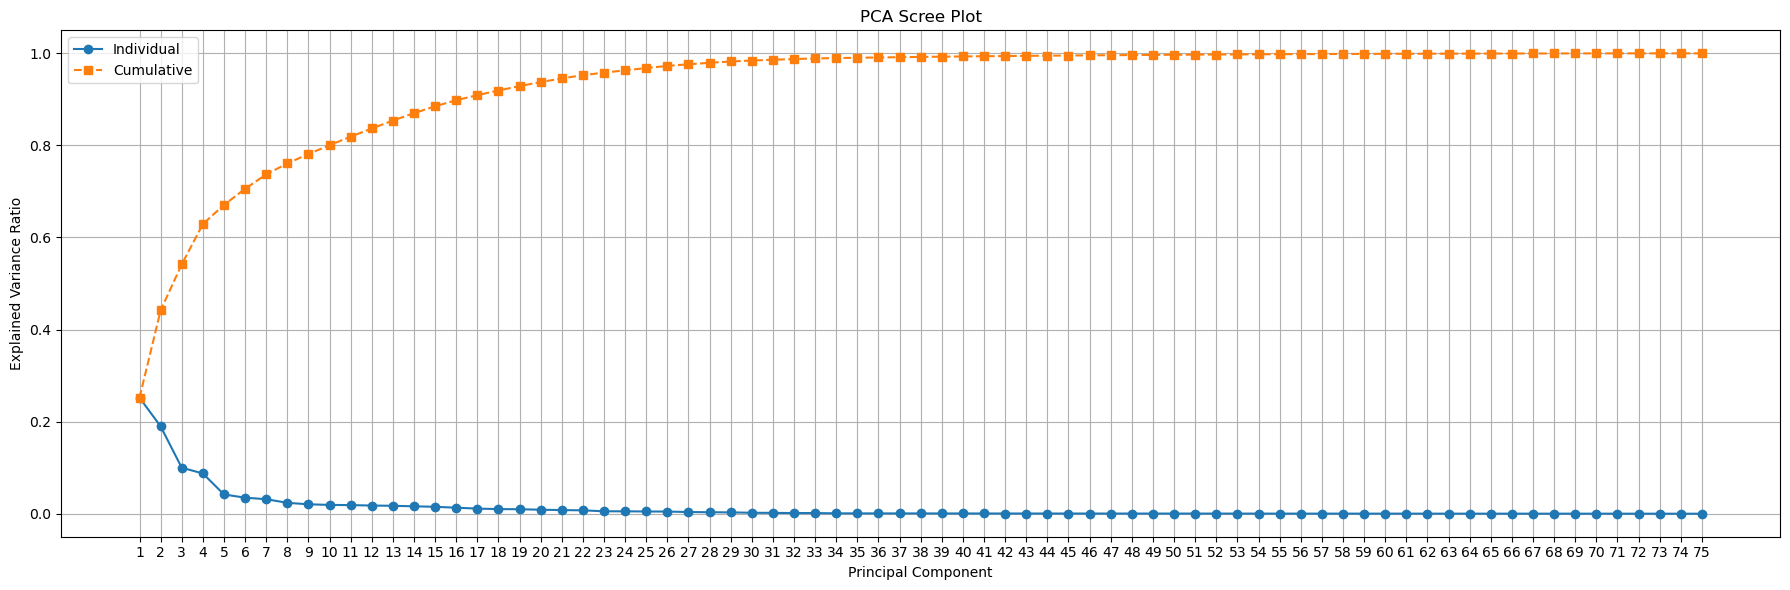

17 components explain ≥90% of variance
PCA with 90% variance kept: 17 components


In [229]:
# define the transformer : StandardScaler for numerical columns + one-hot encoding for categorical columns + binary encoding for 'income'

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# Define the preprocessor with StandardScaler for numerical features and OneHotEncoder for categorical features and binary encoding for 'income' and label encoding for 'hour_type_code' and 'hour_type'
preprocessor = ColumnTransformer([
    ("num", StandardScaler(),    ['age','capital-gain','capital-loss']),
    ("cat", OneHotEncoder(drop='first', sparse_output=False),
             ['workclass','occupation','marital-status','relationship','race','native-country']),
    ("bin", OneHotEncoder(drop='if_binary', sparse_output=False),
         ['income','sex']),
    ("ord", OrdinalEncoder(), ['hour-type','education-group'])
])
#fit and transform the data
X_prepped = preprocessor.fit_transform(df)
#print the shape of the preprocessed data
print("Shape of preprocessed data:", X_prepped.shape)

# --- 1) Fit PCA on your preprocessed data ---
pca = PCA()                        # start with no component limit
pca.fit(X_prepped)

# --- 2) Scree plot / explained variance ---
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(18,6))
plt.plot(np.arange(1, len(explained)+1), explained, 'o-', label='Individual')
plt.plot(np.arange(1, len(explained)+1), cum_explained, 's--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.xticks(np.arange(1, len(explained)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Inspect how many PCs you need for, say, 90% of the variance
n_90 = np.searchsorted(cum_explained, 0.90) + 1
print(f"{n_90} components explain ≥90% of variance")

# --- 3) Re-fit PCA with that number of components ---
pca_n_90 = PCA(n_components=n_90, random_state=42)
X_pca_n_90 = pca_n_90.fit_transform(X_prepped)
# Optionally, add the first two PCs into your DataFrame for plotting:
#df['PC1'] = X_pca[:, 0]
#df['PC2'] = X_pca[:, 1]

# print how many components were kept
print("PCA with 90% variance kept:", pca_n_90.n_components_, "components")


<u><h3> Observation :</u></h3>
- 17 Principal Components explain >= 90% of Variance

<u><h3> Implication :</u></h3>
- We will keep 17 components to feed our clustering algorithms.


# t-SNE

In [230]:
#visualizing the PCA results using  t-SNE
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_pca_n_90)

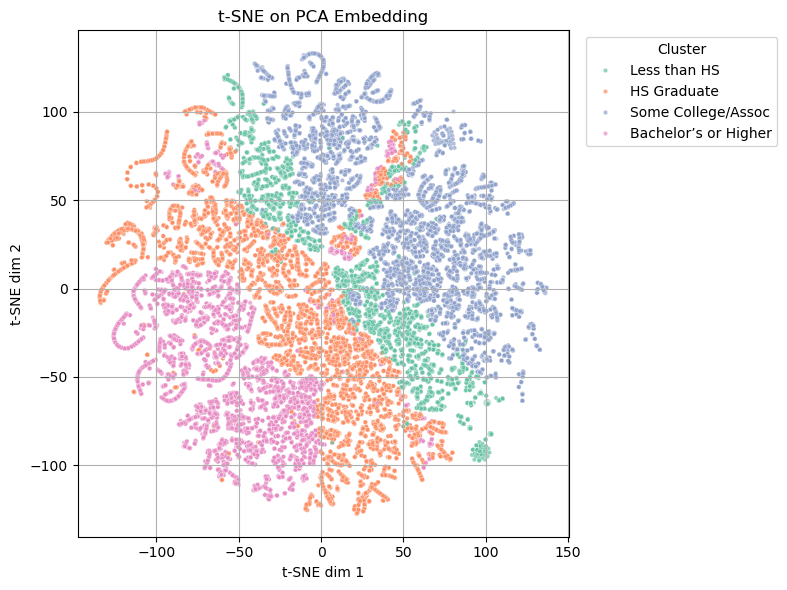

In [236]:
df['TSNE1'], df['TSNE2'] = X_tsne[:,0], X_tsne[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue ='education-group',  # or any other categorical column
    palette='Set2',
    data=df,
    s=10, alpha=0.7
)
plt.title("t-SNE on PCA Embedding")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# K-means

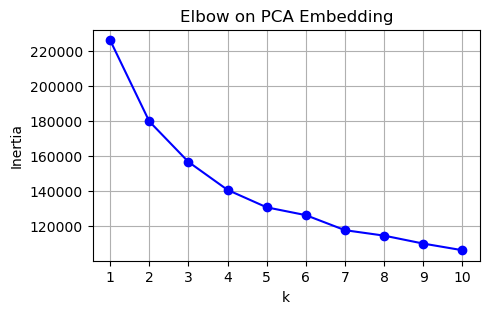

In [237]:
from sklearn.cluster import KMeans
 
# 1) (Optional) Re-run your elbow on the PCA embedding to confirm best_k
inertias = []
Ks = range(1, 11)
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca_n_90)
    inertias.append(km.inertia_)

plt.figure(figsize=(5,3))
plt.plot(Ks, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow on PCA Embedding')
plt.xticks(Ks)
plt.grid(True)
plt.show()

<u><h3> Observation :</u></h3>
- k = 4 is our best_k according to the elbow method. hence we will use it.

/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_80919/646174279.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='Set2')


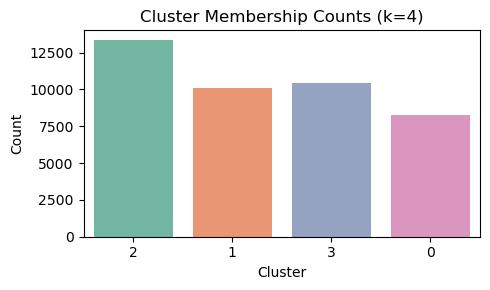

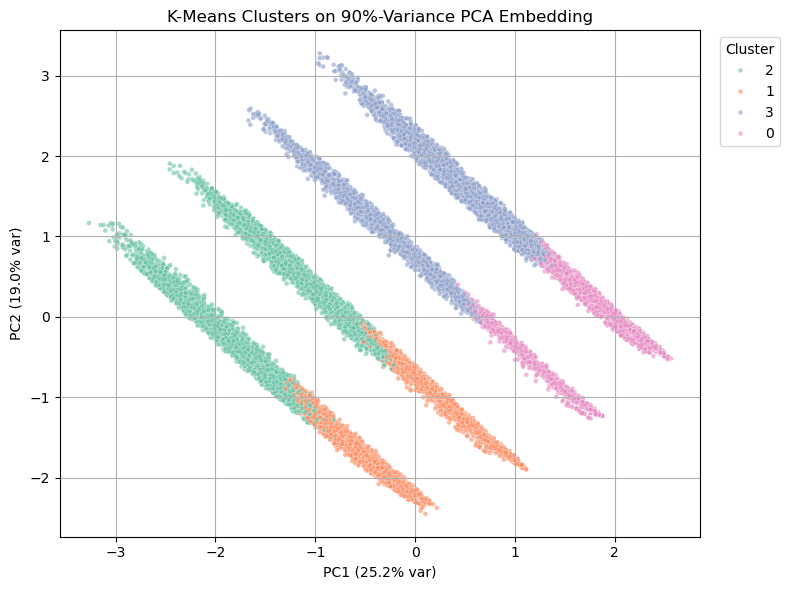

In [238]:
# Choose k based on 'elbow method' 
best_k = 4

# Fit K-Means on the PCA embedding (X_pca_n_90)
km = KMeans(n_clusters=best_k, random_state=42)
km.fit(X_pca_n_90)
labels = km.labels_

#  Attach the cluster labels to our DataFrame
df['cluster'] = labels.astype(str)    # as str for a categorical hue

# Plot cluster sizes
plt.figure(figsize=(5,3))
sns.countplot(x='cluster', data=df, palette='Set2')
plt.title(f"Cluster Membership Counts (k={best_k})")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Profile each cluster on key original columns using aggregation and mode + creating a 'summary' dataframe
# This will give us a summary of each cluster's characteristics
summary = {}
for col in ['age','sex','race','native-country','relationship','marital-status','education-group', 'workclass', 'occupation', 'hour-type','income', 'capital-gain', 'capital-loss']:
    summary[col] = df.groupby('cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)


# Visualize clusters on the first two PCs
df['PC1'] = X_pca_n_90[:, 0]
df['PC2'] = X_pca_n_90[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    palette='Set2',
    data=df,
    s=12, alpha=0.6
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("K-Means Clusters on 90%-Variance PCA Embedding")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [239]:
summary_df = pd.DataFrame(summary)
summary_df

age  sex   race native-country   relationship      marital-status  \
cluster                                                                      
0         20    1  White  United-States      Own-child       Never-married   
1         24    1  White  United-States  Not-in-family       Never-married   
2         47    1  White  United-States         Spouse  Married-civ-spouse   
3         41    1  White  United-States         Spouse  Married-civ-spouse   

            education-group workclass      occupation  hour-type  income  \
cluster                                                                    
0        Some College/Assoc   Private   Other-service  Full-time       0   
1               HS Graduate   Private    Adm-clerical  Full-time       0   
2               HS Graduate   Private  Prof-specialty  Full-time       0   
3        Some College/Assoc   Private    Craft-repair  Full-time       0   

         capital-gain  capital-loss  
cluster                              
0                   0             0  
1                   0             0  
2                   0             0  
3                   0             0

<u><h2> Observations :</u></h2>
	- Cluster 2: the youngest group (median age 20), mostly still “own-child” / never‐married, some college, working full-time in lower‐paid “other‐service” roles.

	- Cluster 0: slightly older single HS-graduates (~24 yrs old) in administrative/clerical full-time jobs.

	- Cluster 1: mid-career (~41 yrs), married, some-college technicians (“craft-repair”), also full-time.

	- Cluster 3: the oldest cohort (~47 yrs), married HS-graduates in professional‐specialty roles, full-time.

<u><h2> Implications :</u></h2>

    - Name our clusters (“Young Full-Timers,” “Single Clerical HS-Grads,” “Mid-Career Techs,” “Senior Professionals”).

    - compute silhouette scores or re-run with a hold-out sample to ensure these four groups hold up.

    - Drill down: within each K-Means segment, you could apply a second clustering (e.g. DBSCAN) on raw features, or analyze how each cluster’s gender/race mix differs, for fairness insights.

# Compute Silhouette Scores

In [240]:
from sklearn.metrics import silhouette_score , silhouette_samples

# compute silhouette score

silhouette_avg = silhouette_score(X_pca_n_90, labels)
print(f"Silhouette Score for k={best_k}: {silhouette_avg:.3f}")
df.info()

Silhouette Score for k=4: 0.165
<class 'pandas.core.frame.DataFrame'>
Index: 42106 entries, 1 to 48841
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              42106 non-null  int64   
 1   workclass        42106 non-null  object  
 2   marital-status   42106 non-null  object  
 3   occupation       42106 non-null  object  
 4   relationship     42106 non-null  object  
 5   race             42106 non-null  object  
 6   sex              42106 non-null  int64   
 7   capital-gain     42106 non-null  int64   
 8   capital-loss     42106 non-null  int64   
 9   native-country   42106 non-null  object  
 10  income           42106 non-null  int64   
 11  hour-type        42106 non-null  category
 12  education-group  42106 non-null  category
 13  TSNE1            42106 non-null  float32 
 14  TSNE2            42106 non-null  float32 
 15  cluster          42106 non-null  object  
 16  PC1          

## We got Silhouette Score of 0.165 for 4 clusters, which is considered poor. We will try to cluster on k = 3 and re-compute the Silhouette Score

k=2 : silhouette=0.197
k=3 : silhouette=0.176
k=4 : silhouette=0.165


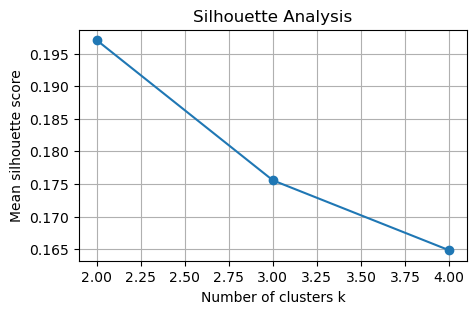

In [241]:
Ks = [2, 3, 4]
sil_scores = []

for k in Ks:
    # 1) Fit K-Means for this k
    km     = KMeans(n_clusters=k, random_state=42).fit(X_pca_n_90)
    labels = km.labels_
    
    # 2) Compute the silhouette score on the same embedding + labels
    score  = silhouette_score(X_pca_n_90, labels, metric='euclidean')
    sil_scores.append(score)
    print(f"k={k} : silhouette={score:.3f}")

# 3) (Optional) Visualize the results
plt.figure(figsize=(5,3))
plt.plot(Ks, sil_scores, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Mean silhouette score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

# Overall, the Silhouette Score k = 2-4 clusters is < 0.2 , which is considered poor. Maybe K-means runs poorly on our Data?

/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_80919/865514863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='Set2')


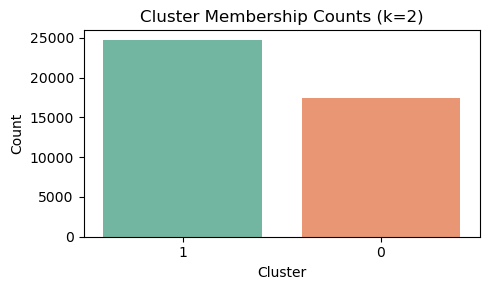

In [244]:
#we will use the best k = 32 
best_k = 2
# Fit K-Means on the PCA embedding (X_pca_n_90)
km = KMeans(n_clusters=best_k, random_state=42)
km.fit(X_pca_n_90)
labels = km.labels_
# Attach the cluster labels to our DataFrame
df['cluster'] = labels.astype(str)    # as str for a categorical hue
# Plot cluster sizes
plt.figure(figsize=(5,3))
sns.countplot(x='cluster', data=df, palette='Set2')
plt.title(f"Cluster Membership Counts (k={best_k})")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

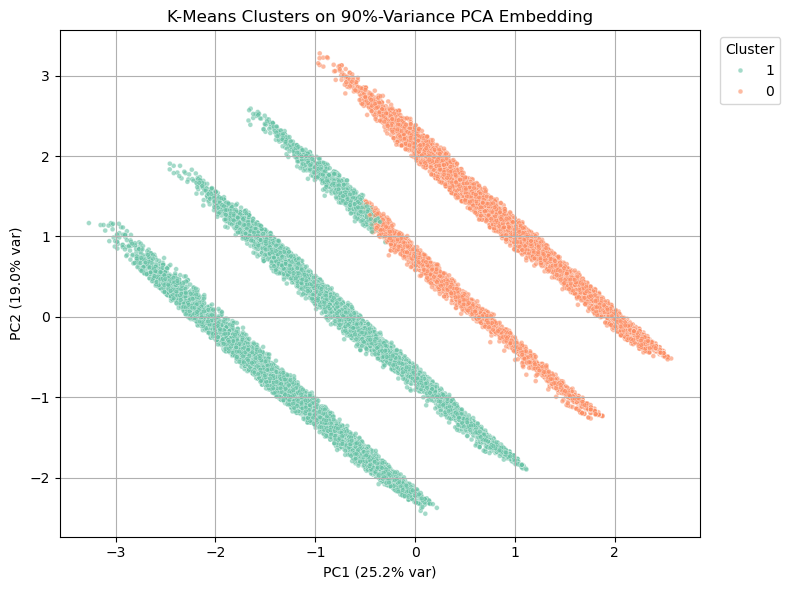

In [245]:
summary = {}
for col in ['age','sex','race','native-country','relationship','marital-status','education-group', 'workclass', 'occupation', 'hour-type','income', 'capital-gain', 'capital-loss']:
    summary[col] = df.groupby('cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)


# Visualize clusters on the first two PCs
df['PC1'] = X_pca_n_90[:, 0]
df['PC2'] = X_pca_n_90[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    palette='Set2',
    data=df,
    s=12, alpha=0.6
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("K-Means Clusters on 90%-Variance PCA Embedding")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [246]:
summary_df = pd.DataFrame(summary)
summary_df

age  sex   race native-country relationship      marital-status  \
cluster                                                                    
0         20    1  White  United-States       Spouse       Never-married   
1         35    1  White  United-States       Spouse  Married-civ-spouse   

            education-group workclass      occupation  hour-type  income  \
cluster                                                                    
0        Some College/Assoc   Private    Adm-clerical  Full-time       0   
1               HS Graduate   Private  Prof-specialty  Full-time       0   

         capital-gain  capital-loss  
cluster                              
0                   0             0  
1                   0             0

In [ ]:
'''
cluster_names = {
    "0": "Mid-Career HS-Grad Professionals",
    "1": "Late-Career HS-Grad Technicians",
    "2": "Early-Career Some-College Clerks"
}
# Rename clusters in the DataFrame
df['cluster'] = df['cluster'].map(cluster_names)
'''

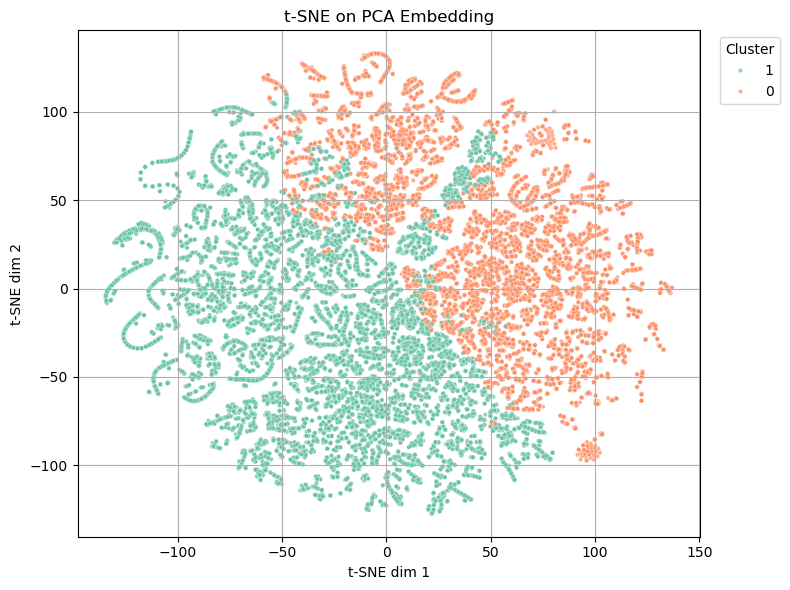

In [247]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue ='cluster',  # or any other categorical column
    palette='Set2',
    data=df,
    s=10, alpha=0.7
)
plt.title("t-SNE on PCA Embedding")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Maybe all of the 'missing' values, that we have found that they behave as 'noise' are hurting our clustering ?
## We will try to replace the 'missing' values with mode/median of each column and then re-compute the silhouette scores again.


In [248]:
#we will impute the 'missing' values in 'occupation' and 'workclass' and 'native-country' columns with the most frequent value in each column
for col in ['occupation', 'workclass', 'native-country']:
    df_copy[col] = df_copy[col].replace('missing',df_copy[col].mode()[0])
#we will keep a copy of the original DataFrame with the 'missing' values replaced
df_imputed = df_copy.copy()




We kept 'df_imputed' as a copy for later processing

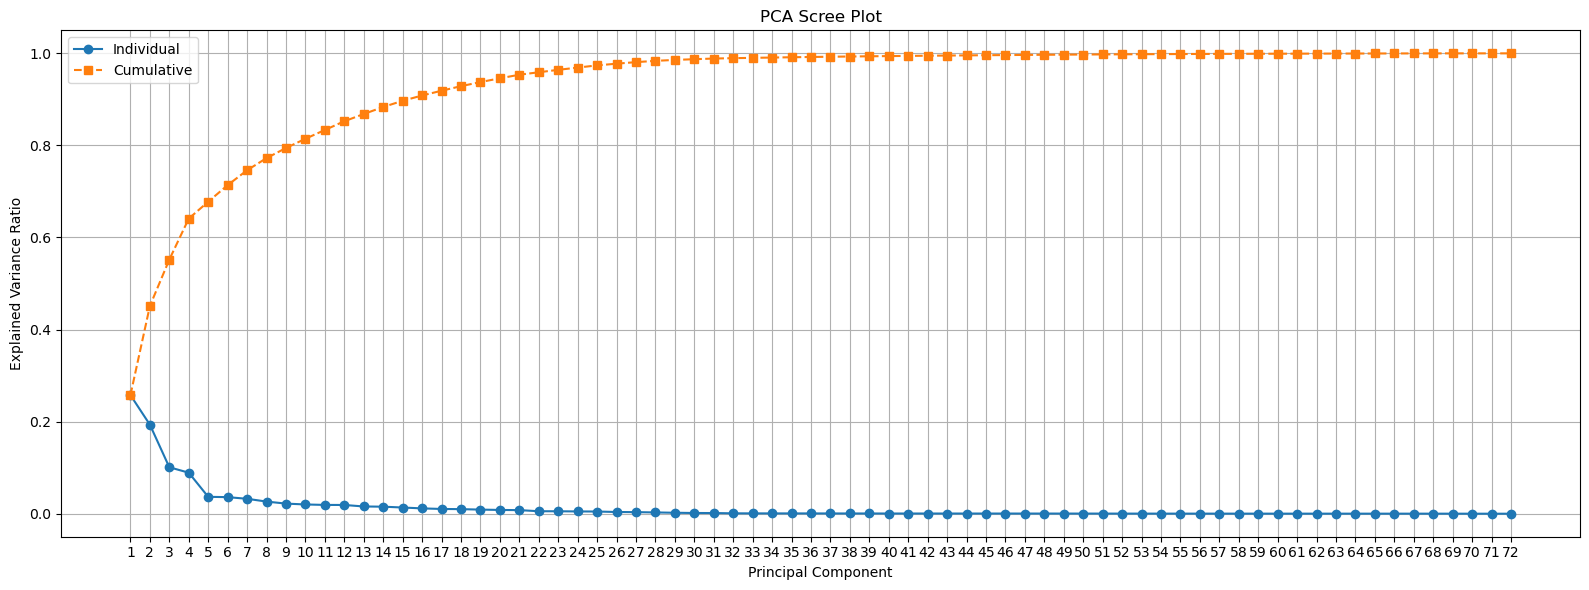

16 components explain ≥90% of variance
PCA with 90% variance kept: 16 components


In [249]:
# we will run the same preprocessing steps on the df_copy DataFrame
X_prepped_copy = preprocessor.fit_transform(df_copy)
#Do the PCA again on the preprocessed data
pca_copy = PCA()                        # start with no component limit
pca_copy.fit(X_prepped_copy)

# --- 2) Scree plot / explained variance ---
explained = pca_copy.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(16,6))
plt.plot(np.arange(1, len(explained)+1), explained, 'o-', label='Individual')
plt.plot(np.arange(1, len(explained)+1), cum_explained, 's--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.xticks(np.arange(1, len(explained)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Inspect how many PCs you need for, say, 90% of the variance
n_90 = np.searchsorted(cum_explained, 0.90) + 1
print(f"{n_90} components explain ≥90% of variance")

# --- 3) Re-fit PCA with that number of components ---
pca_n_90 = PCA(n_components=n_90, random_state=42)
X_pca_n_90 = pca_n_90.fit_transform(X_prepped_copy)
# Optionally, add the first two PCs into your DataFrame for plotting:
#df['PC1'] = X_pca[:, 0]
#df['PC2'] = X_pca[:, 1]

# print how many components were kept
print("PCA with 90% variance kept:", pca_n_90.n_components_, "components")


In [262]:
n_90 = pca_n_90.n_components_
print(f"Number of components after PCA: {n_90}")

Number of components after PCA: 16


# Run K-means again

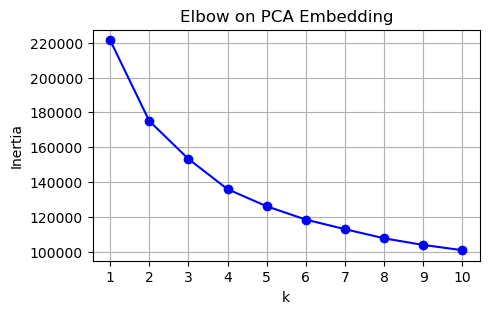

In [250]:

 
# 1) (Optional) Re-run your elbow on the PCA embedding to confirm best_k
inertias = []
Ks = range(1, 11)
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca_n_90)
    inertias.append(km.inertia_)

plt.figure(figsize=(5,3))
plt.plot(Ks, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow on PCA Embedding')
plt.xticks(Ks)
plt.grid(True)
plt.show()

<u><h3> Observation :</u></h3>
- k = 3 is our best_k according to the elbow method. hence we will use it.

/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_80919/2506768534.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_copy, palette='Set2')


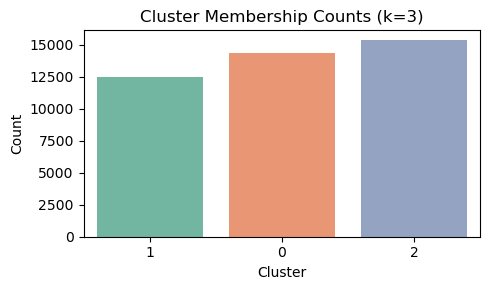

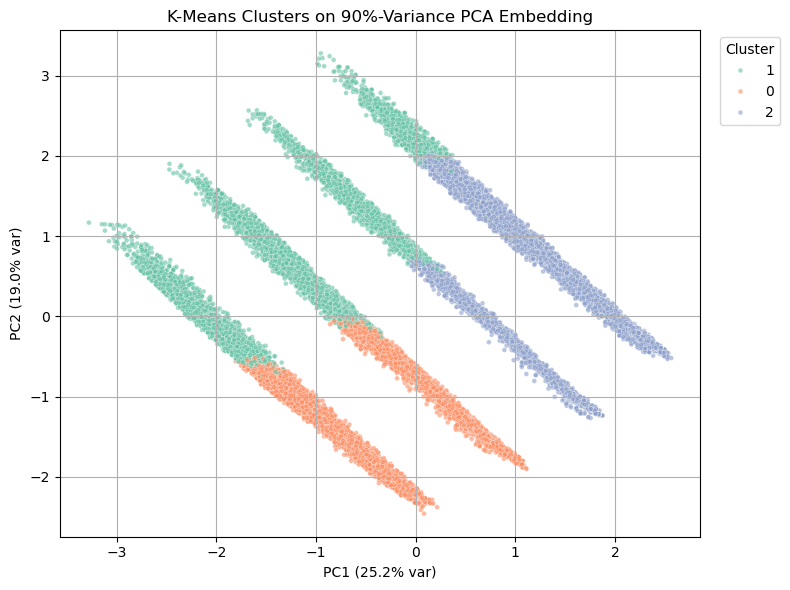

In [251]:
# Choose k based on 'elbow method' 
best_k = 3

# Fit K-Means on the PCA embedding (X_pca_n_90)
km = KMeans(n_clusters=best_k, random_state=42)
km.fit(X_pca_n_90)
labels = km.labels_
#

#  Attach the cluster labels to our DataFrame 
df_copy['cluster'] = labels.astype(str)    # as str for a categorical hue


# Plot cluster sizes
plt.figure(figsize=(5,3))
sns.countplot(x='cluster', data=df_copy, palette='Set2')
plt.title(f"Cluster Membership Counts (k={best_k})")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Profile each cluster on key original columns using aggregation and mode + creating a 'summary' dataframe
# This will give us a summary of each cluster's characteristics
summary = {}
for col in ['age','sex','race','native-country','relationship','marital-status','education-group', 'workclass', 'occupation', 'hour-type','income', 'capital-gain', 'capital-loss']:
    summary[col] = df_copy.groupby('cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)


# Visualize clusters on the first two PCs
df_copy['PC1'] = X_pca_n_90[:, 0]
df_copy['PC2'] = X_pca_n_90[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    palette='Set2',
    data=df_copy,
    s=12, alpha=0.6
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("K-Means Clusters on 90%-Variance PCA Embedding")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [257]:
summary_df = pd.DataFrame(summary)
summary_df
#people who are 'spouse' and 'never-married' are in the same cluster --> this is an anomalie, we will check the values in the 'relationship' and 'marital-status' columns
df_copy[(df_copy['relationship'] == 'Spouse') & (df_copy['marital-status'] == 'Never-married')].head()

Empty DataFrame
Columns: [age, workclass, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, native-country, income, hour-type, education-group, cluster, PC1, PC2]
Index: []

k=2 : silhouette=0.200
k=3 : silhouette=0.164
k=4 : silhouette=0.169


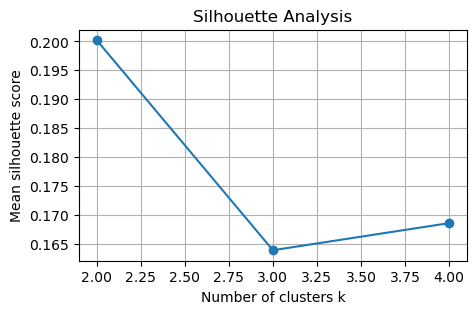

In [253]:
Ks = [2, 3, 4]
sil_scores = []

for k in Ks:
    # 1) Fit K-Means for this k
    km     = KMeans(n_clusters=k, random_state=42).fit(X_pca_n_90)
    labels = km.labels_
    
    # 2) Compute the silhouette score on the same embedding + labels
    score  = silhouette_score(X_pca_n_90, labels, metric='euclidean')
    sil_scores.append(score)
    print(f"k={k} : silhouette={score:.3f}")

# 3) (Optional) Visualize the results
plt.figure(figsize=(5,3))
plt.plot(Ks, sil_scores, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Mean silhouette score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

<u><h2> Observation :</u></h2>

- Still very low Silhouette Score 

<u><h2> Implication :</u></h2>
- We will try another clustering algorithm --> GMM ( Gaussian Mixture Models )


In [ ]:
# Keep a copy of the DataFrame
df_imputed_copy = df_imputed.copy()  
df_imputed.head()

age         workclass      marital-status         occupation  \
1   50  Self-emp-not-inc  Married-civ-spouse    Exec-managerial   
2   38           Private            Divorced  Handlers-cleaners   
3   53           Private  Married-civ-spouse  Handlers-cleaners   
4   28           Private  Married-civ-spouse     Prof-specialty   
5   37           Private  Married-civ-spouse    Exec-managerial   

    relationship   race  sex  capital-gain  capital-loss native-country  \
1         Spouse  White    1             0             0  United-States   
2  Not-in-family  White    1             0             0  United-States   
3         Spouse  Black    1             0             0  United-States   
4         Spouse  Black    0             0             0           Cuba   
5         Spouse  White    0             0             0  United-States   

   income  hour-type       education-group  
1       0  Part-time  Bachelor’s or Higher  
2       0  Full-time           HS Graduate  
3       0  Full-time          Less than HS  
4       0  Full-time  Bachelor’s or Higher  
5       0  Full-time  Bachelor’s or Higher

In [263]:
#We will run GMM pipline on the PCA embedding
from sklearn.mixture import GaussianMixture
# Fit GMM on the PCA embedding (X_pca_n_90)
gmm_pipeline = Pipeline([
    ("prep", preprocessor),
    ("pca", PCA(n_components=n_90, random_state=42)),
    ("gmm", GaussianMixture(n_components=best_k, random_state=42))
])
gmm_pipeline.fit(df_imputed)
# Predict cluster labels
df_imputed["gmm_cluster"] = gmm_pipeline.named_steps["gmm"].predict(
    gmm_pipeline.named_steps["pca"].transform(
      gmm_pipeline.named_steps["prep"].transform(df_imputed)
    )
)

In [267]:
df_imputed.head()

age         workclass      marital-status         occupation  \
1   50  Self-emp-not-inc  Married-civ-spouse    Exec-managerial   
2   38           Private            Divorced  Handlers-cleaners   
3   53           Private  Married-civ-spouse  Handlers-cleaners   
4   28           Private  Married-civ-spouse     Prof-specialty   
5   37           Private  Married-civ-spouse    Exec-managerial   

    relationship   race  sex  capital-gain  capital-loss native-country  \
1         Spouse  White    1             0             0  United-States   
2  Not-in-family  White    1             0             0  United-States   
3         Spouse  Black    1             0             0  United-States   
4         Spouse  Black    0             0             0           Cuba   
5         Spouse  White    0             0             0  United-States   

   income  hour-type       education-group  gmm_cluster  
1       0  Part-time  Bachelor’s or Higher            1  
2       0  Full-time           HS Graduate            0  
3       0  Full-time          Less than HS            1  
4       0  Full-time  Bachelor’s or Higher            1  
5       0  Full-time  Bachelor’s or Higher            1

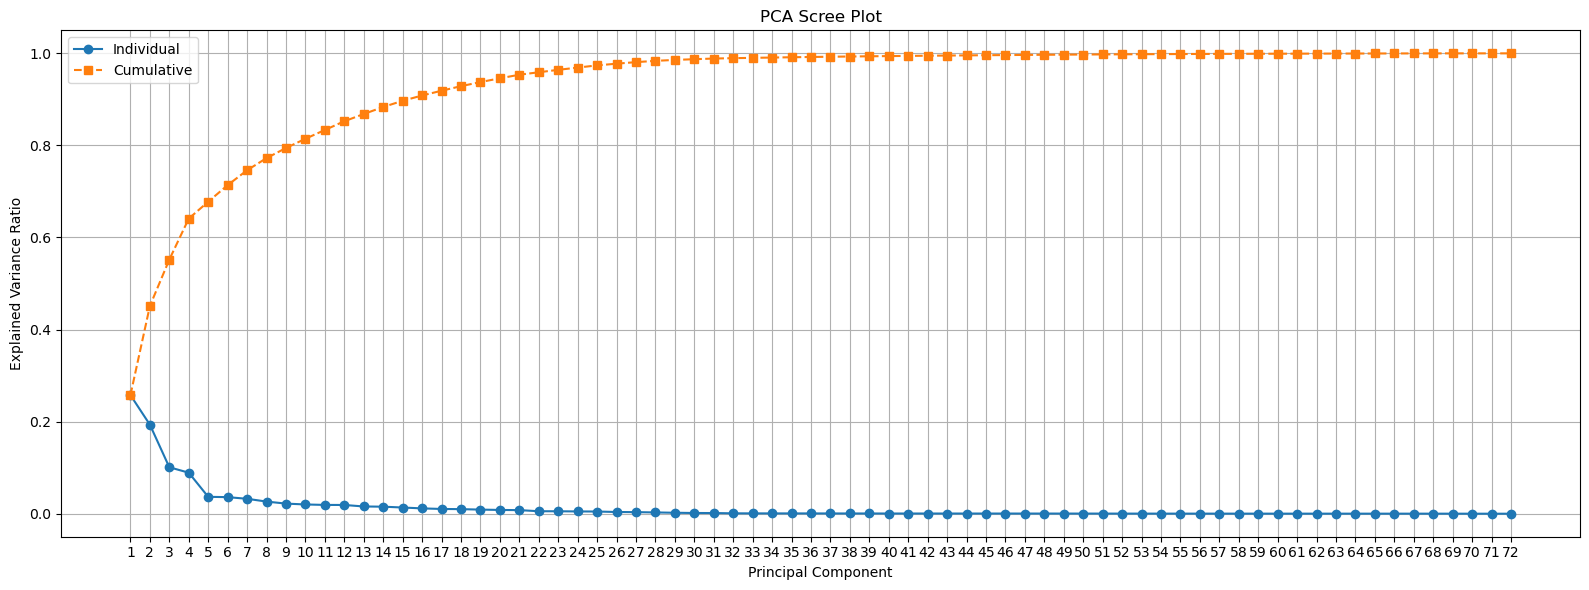

16 components explain ≥90% of variance
PCA with 90% variance kept: 16 components


In [268]:
# we will run the same preprocessing steps on the df_copy DataFrame
X_prepped_copy = preprocessor.fit_transform(df_imputed)
#Do the PCA again on the preprocessed data
pca_copy = PCA()                        # start with no component limit
pca_copy.fit(X_prepped_copy)

# --- 2) Scree plot / explained variance ---
explained = pca_copy.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(16,6))
plt.plot(np.arange(1, len(explained)+1), explained, 'o-', label='Individual')
plt.plot(np.arange(1, len(explained)+1), cum_explained, 's--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.xticks(np.arange(1, len(explained)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Inspect how many PCs you need for, say, 90% of the variance
n_90 = np.searchsorted(cum_explained, 0.90) + 1
print(f"{n_90} components explain ≥90% of variance")

# --- 3) Re-fit PCA with that number of components ---
pca_n_90 = PCA(n_components=n_90, random_state=42)
X_pca_n_90 = pca_n_90.fit_transform(X_prepped_copy)
# Optionally, add the first two PCs into your DataFrame for plotting:
#df['PC1'] = X_pca[:, 0]
#df['PC2'] = X_pca[:, 1]

# print how many components were kept
print("PCA with 90% variance kept:", pca_n_90.n_components_, "components")

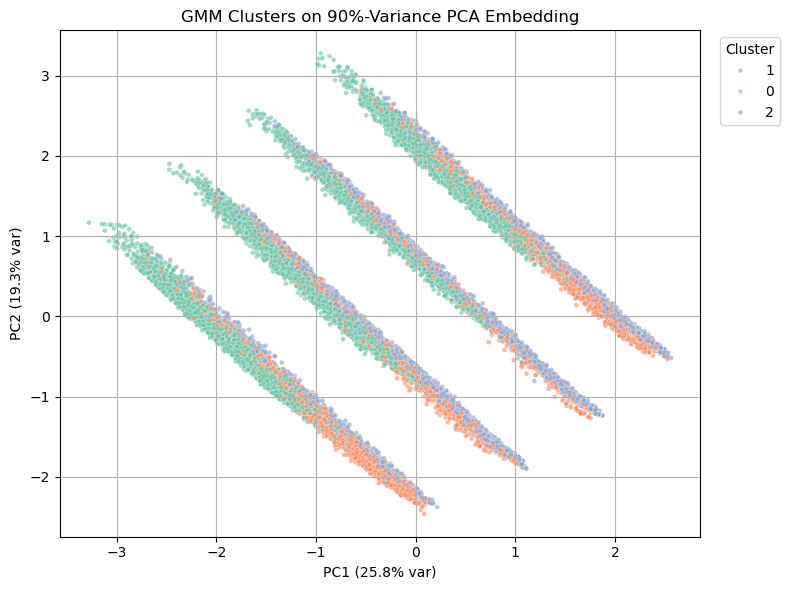

In [270]:
df_imputed['PC1'] = X_pca_n_90[:, 0]
df_imputed['PC2'] = X_pca_n_90[:, 1]
df_imputed['gmm_cluster'] = df_imputed['gmm_cluster'].astype(str)  # Convert to str for categorical hue

# Visualize clusters on the first two PCs
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='gmm_cluster',
    palette='Set2',
    data=df_imputed,
    s=12, alpha=0.6
)
plt.xlabel(f"PC1 ({pca_n_90.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca_n_90.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("GMM Clusters on 90%-Variance PCA Embedding")
plt.legend(title="Cluster", bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()